In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import colormaps
from mne_connectivity.viz import plot_connectivity_circle

In [2]:
patient_list  =  ['P1 N1', 'P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P4 N1', 'P4 N2', 'P5 N1',
                  'P6 N1', 'P6 N2', 'P7 N1', 'P7 N2','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                   'P29 N2', 'P30 N1'] 

nt_genotype_human = ['P1 N1', 'P4 N1', 'P4 N2', 'P8 N1', 'P11 N1', 'P17 N1', 'P18 N1', 'P21 N1', 'P21 N2', 'P21 N3', 'P24 N1', 'P27 N1', 'P28 N1', 'P28 N2', 'P29 N2']
gap_genotype_human = ['P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P5 N1', 'P6 N1', 'P6 N2', 'P7 N1', 'P7 N2', 'P10 N1', 'P15 N1', 'P16 N1', 'P20 N1', 'P22 N1', 'P23 N1', 'P23 N3', 'P30 N1']
save_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/'

In [3]:
def analyse_files(folder_path, file_type, patient_list, wt_list, gap_list):
    all_patients_analysis = []
    genotype_ls = [] 
    for patient in patient_list:
        analysis_file = pd.read_csv(f'{folder_path}{patient}_{file_type}.csv')
        analysis_file['Patient'] = [patient]*len(analysis_file)
        all_patients_analysis.append(analysis_file)
        if patient in wt_list:
            genotype_df = pd.DataFrame(data = {'Genotype': [0]*len(analysis_file)})
            genotype_ls.append(genotype_df)
        elif patient in gap_list:
            genotype_df = pd.DataFrame(data = {'Genotype': [1]*len(analysis_file)})
            genotype_ls.append(genotype_df)
        else:
            print(f'{patient} not in wt or gap')
            
    patients_concat = pd.concat(all_patients_analysis)
    genotype_concat = pd.concat(genotype_ls)
    all_files_concat = pd.concat([genotype_concat, patients_concat], axis = 1)
    
    return all_files_concat


def plot_power(power_df, genotype, save_path, patient):
    fig, axs = plt.subplots(1,1, figsize=(15,10), sharex = True, sharey=True)
    if genotype == 0:
        power_palette = 'winter'
    elif genotype == 1:
        power_palette = 'spring'
    
    sns.lineplot(data= power_df, x='Frequency', y='Power',hue = 'Channel', errorbar = ("se"), linewidth = 2,
            palette = power_palette)
    sns.despine()
    plt.yscale('log')
    axs.set_xlim(1, 35)
    axs.set_ylim(10**-13, 10**-7)

    axs.set_xlabel("Frequency (Hz)", fontsize = 15)
    axs.set_ylabel("log Power (\u03bc$\\mathregular{V^{2}}$)", fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)

    #include an overall plot title
    plt.suptitle(f'{patient}', fontsize = 15, fontweight = 'bold')
    plt.savefig(f'{save_path}{patient}_power.png')
    plt.savefig(f'{save_path}{patient}_power.svg')
    
def barplot_prepare(concat_dataframe, variable_name='hfd', split_index = -1):
    # Melt the DataFrame
    df_melted = concat_dataframe.melt(id_vars=['Genotype', 'Patient'], var_name='Channel', value_name=variable_name)
    
    # Extract the channel from the variable name
    df_melted['Channel'] = df_melted['Channel'].apply(lambda x: x.split('_')[split_index])
    
    # Rename the columns
    df_melted = df_melted.rename(columns={variable_name: f'{variable_name}', 'Channel': 'channel'})
    
    return df_melted

def separate_power_frequency(df):
    # Melt the DataFrame to long format
    df_melted = df.melt(id_vars=['Patient', 'Epoch'], var_name='Power_Frequency_Channel', value_name='Power')
    
    # Extract 'Frequency' and 'Channel' from 'Power_Frequency_Channel'
    df_melted[['Frequency', 'Channel']] = df_melted['Power_Frequency_Channel'].str.extract(r'Power_([a-z]+)_(\d+)')
    
    # Convert 'Channel' to integer
    df_melted['Channel'] = df_melted['Channel'].astype(int)
    
    # Drop the original 'Power_Frequency_Channel' column
    df_melted = df_melted.drop(columns='Power_Frequency_Channel')
    
    return df_melted

### 1. Dispersion Entropy 

In [87]:
dispen_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/DispEn/'

In [126]:
dispen_concat = analyse_files(folder_path = dispen_path, file_type = 'dispen', patient_list = patient_list,
                             wt_list = nt_genotype_human, gap_list = gap_genotype_human)

Genotype  E1_dispen  E2_dispen  F3_dispen  C3_dispen  O1_dispen  \
0           0   1.544829   1.734211   1.377302   1.664450   1.637091   
1           0   1.726082   1.959540   1.974854   1.947366   2.074029   
2           0   1.657216   1.852764   2.186308   2.681092   2.213581   
3           0   1.607393   1.696106   1.587280   1.771192   1.692554   
4           0   1.768460   1.783759   1.671917   1.974867   1.823064   
..        ...        ...        ...        ...        ...        ...   
872         1   2.422909   2.510931   2.553581   2.647442   2.578583   
873         1   2.489863   2.519783   2.425061   2.264983   2.130058   
874         1   2.138662   2.447055   2.134380   2.362109   2.322673   
875         1   2.112052   2.073694   2.066033   2.130596   1.796899   
876         1   2.087189   1.999864   1.984845   2.195905   1.678674   

     M2_dispen Patient  
0     1.624979   P1 N1  
1     1.679804   P1 N1  
2     1.504507   P1 N1  
3     1.450994   P1 N1  
4     1.560174   P1 N1  
..         ...     ...  
872   2.058323  P30 N1  
873   2.279193  P30 N1  
874   2.428495  P30 N1  
875   2.542133  P30 N1  
876   2.552755  P30 N1  

[128398 rows x 8 columns]

In [201]:
dispen_melted = plot_prepare(concat_dataframe = dispen_concat, variable_name = 'Dispen', split_index = 0)
dispen_melted = dispen_melted[dispen_melted['channel'] != 'M2']
mean_dispen = dispen_melted.groupby(['Patient', 'channel', 'Genotype'])['Dispen'].mean().reset_index() 

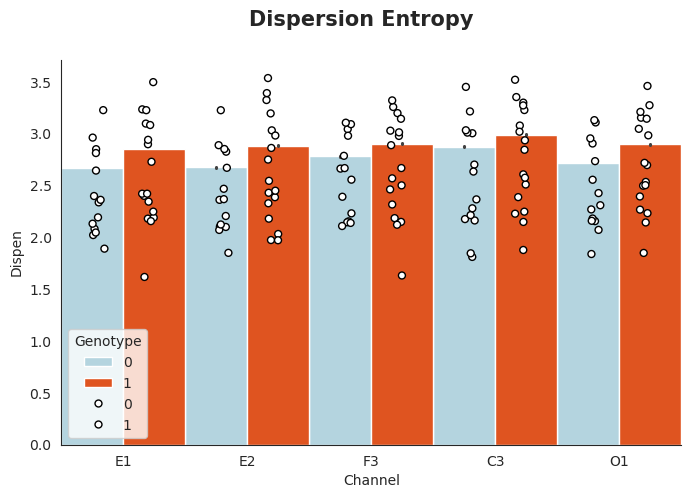

In [97]:
f, ax = plt.subplots(1,1, figsize=(8,5), sharey = True)
sns.set_style("white")
palette_plot = ['lightblue', 'orangered']
hueorder = [0, 1]
pointplot_palette = ['white', 'white']
sns.despine()
plt.suptitle('Dispersion Entropy', fontsize = 15, fontweight = 'bold')
sns.barplot(x= 'Channel', y='Dispen', hue='Genotype', errorbar = ("se"), data = dispen_melted, 
            hue_order = hueorder, width = 1.0,palette = palette_plot)
sns.stripplot(x = 'Channel', y = 'Dispen', hue = 'Genotype', data = mean_dispen, palette = pointplot_palette,
              edgecolor = 'k', dodge = True, linewidth = 1)

plt.savefig(f'{save_path}dispersion_entropy.png')
plt.savefig(f'{save_path}dispersion_entropy.svg')

## 2. Higuchi's Fractal Dimension

In [15]:
hfd_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/hfd/'

In [16]:
hfd_concat = analyse_files(folder_path = hfd_path, file_type = 'hfd', patient_list = patient_list,
                             wt_list = nt_genotype_human, gap_list = gap_genotype_human)

In [17]:
hfd_concat

Genotype  hfd_chan_0  hfd_chan_1  hfd_chan_2  hfd_chan_3  hfd_chan_4  \
0           0    1.281659    1.356857    1.443605    1.455377    1.400428   
1           0    1.245554    1.247783    1.307705    1.386245    1.347598   
2           0    1.218610    1.218719    1.443252    1.564114    1.434888   
3           0    1.295126    1.337063    1.339633    1.484725    1.412665   
4           0    1.237608    1.260508    1.347309    1.552783    1.421154   
..        ...         ...         ...         ...         ...         ...   
872         1    1.073465    1.074639    1.066013    1.148640    1.112540   
873         1    1.080244    1.080445    1.123070    1.194130    1.164164   
874         1    1.178738    1.176983    1.258695    1.322602    1.244002   
875         1    1.148823    1.151172    1.204850    1.256278    1.226778   
876         1    1.169108    1.170161    1.222971    1.379080    1.268312   

     hfd_chan_5 Patient  
0      1.040776   P1 N1  
1      1.025445   P1 N1  
2      1.018065   P1 N1  
3      1.007476   P1 N1  
4      1.025981   P1 N1  
..          ...     ...  
872    1.140124  P30 N1  
873    1.158372  P30 N1  
874    1.156172  P30 N1  
875    1.163000  P30 N1  
876    1.163333  P30 N1  

[128398 rows x 8 columns]

In [18]:
hfd_melted = plot_prepare(concat_dataframe = hfd_concat, variable_name = 'hfd')
hfd_melted = hfd_melted[hfd_melted['channel'] != '5']
mean_hfd = hfd_melted.groupby(['Patient', 'channel', 'Genotype'])['hfd'].mean().reset_index() 

In [20]:
mean_hfd

Patient channel  Genotype       hfd
0     P1 N1       0         0  1.253240
1     P1 N1       1         0  1.251462
2     P1 N1       2         0  1.214992
3     P1 N1       3         0  1.220890
4     P1 N1       4         0  1.254778
..      ...     ...       ...       ...
150   P8 N1       0         0  1.442076
151   P8 N1       1         0  1.451523
152   P8 N1       2         0  1.511031
153   P8 N1       3         0  1.596420
154   P8 N1       4         0  1.379358

[155 rows x 4 columns]

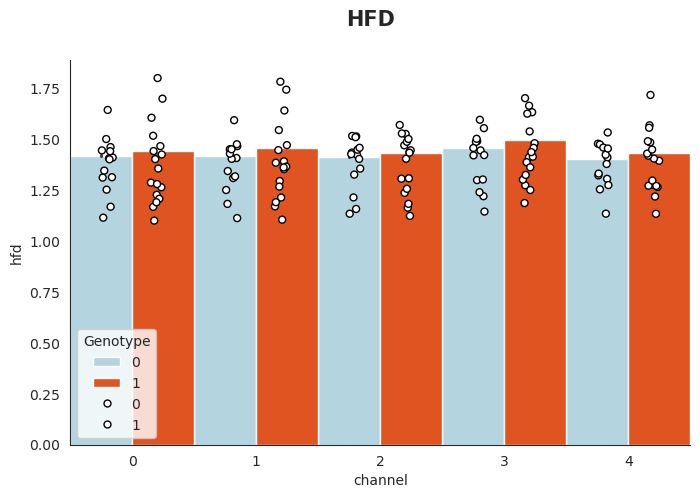

In [251]:
f, ax = plt.subplots(1,1, figsize=(8,5), sharey = True)
sns.set_style("white")
palette_plot = ['lightblue', 'orangered']
hueorder = [0, 1]
pointplot_palette = ['white', 'white']
sns.despine()
plt.suptitle('HFD', fontsize = 15, fontweight = 'bold')
sns.barplot(x= 'channel', y='hfd', hue='Genotype', errorbar = ("se"), data = hfd_melted, 
            hue_order = hueorder, width = 1.0,palette = palette_plot)
sns.stripplot(x = 'channel', y = 'hfd', hue = 'Genotype', data = mean_hfd, palette = pointplot_palette,
              edgecolor = 'k', dodge = True, linewidth = 1)

plt.savefig(f'{save_path}hfd.png')
plt.savefig(f'{save_path}hfd.svg')

## 3. Power 

/tmp/ipykernel_1063413/2830572772.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1,1, figsize=(15,10), sharex = True, sharey=True)


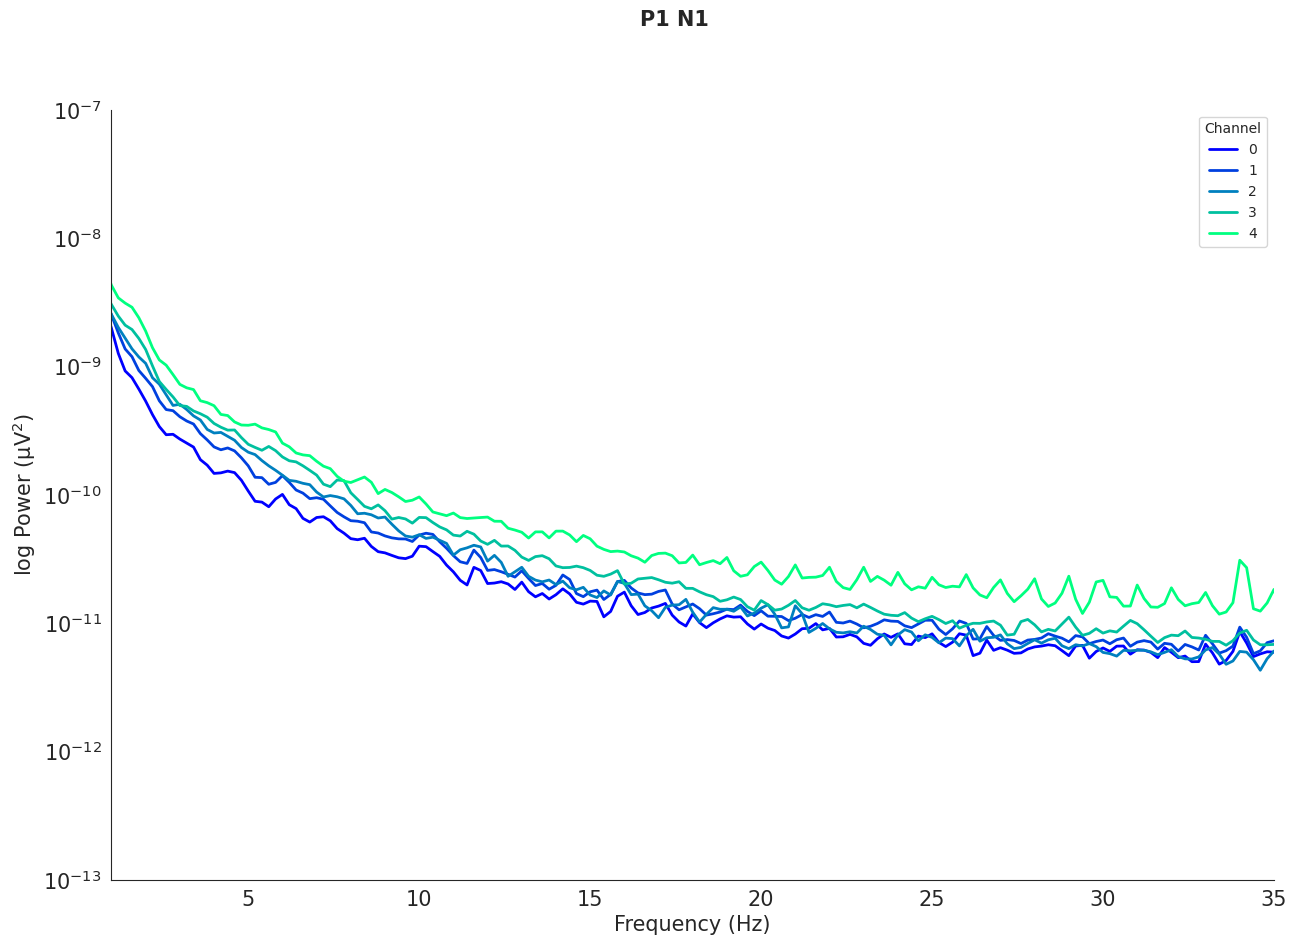

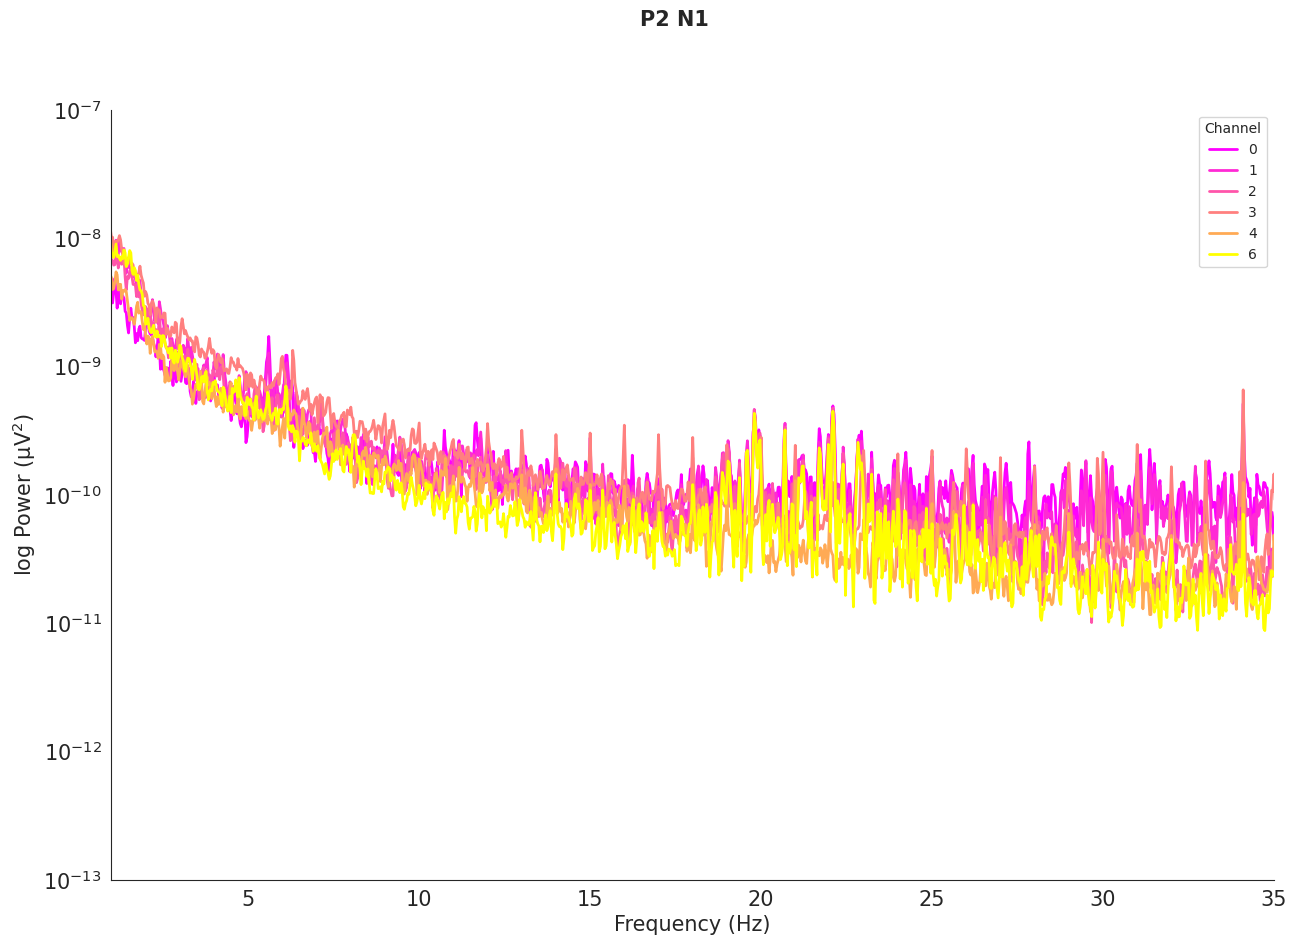

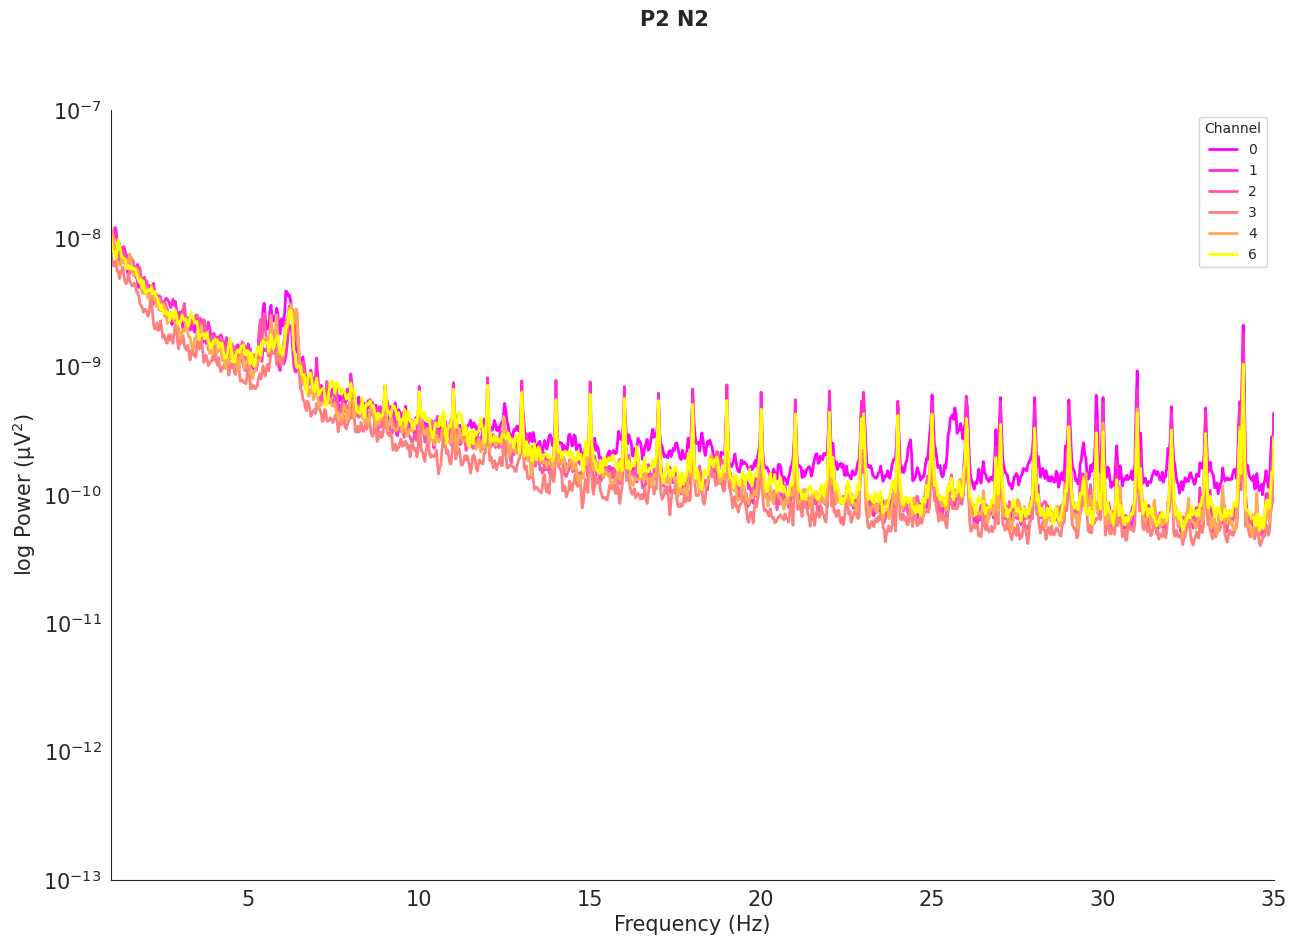

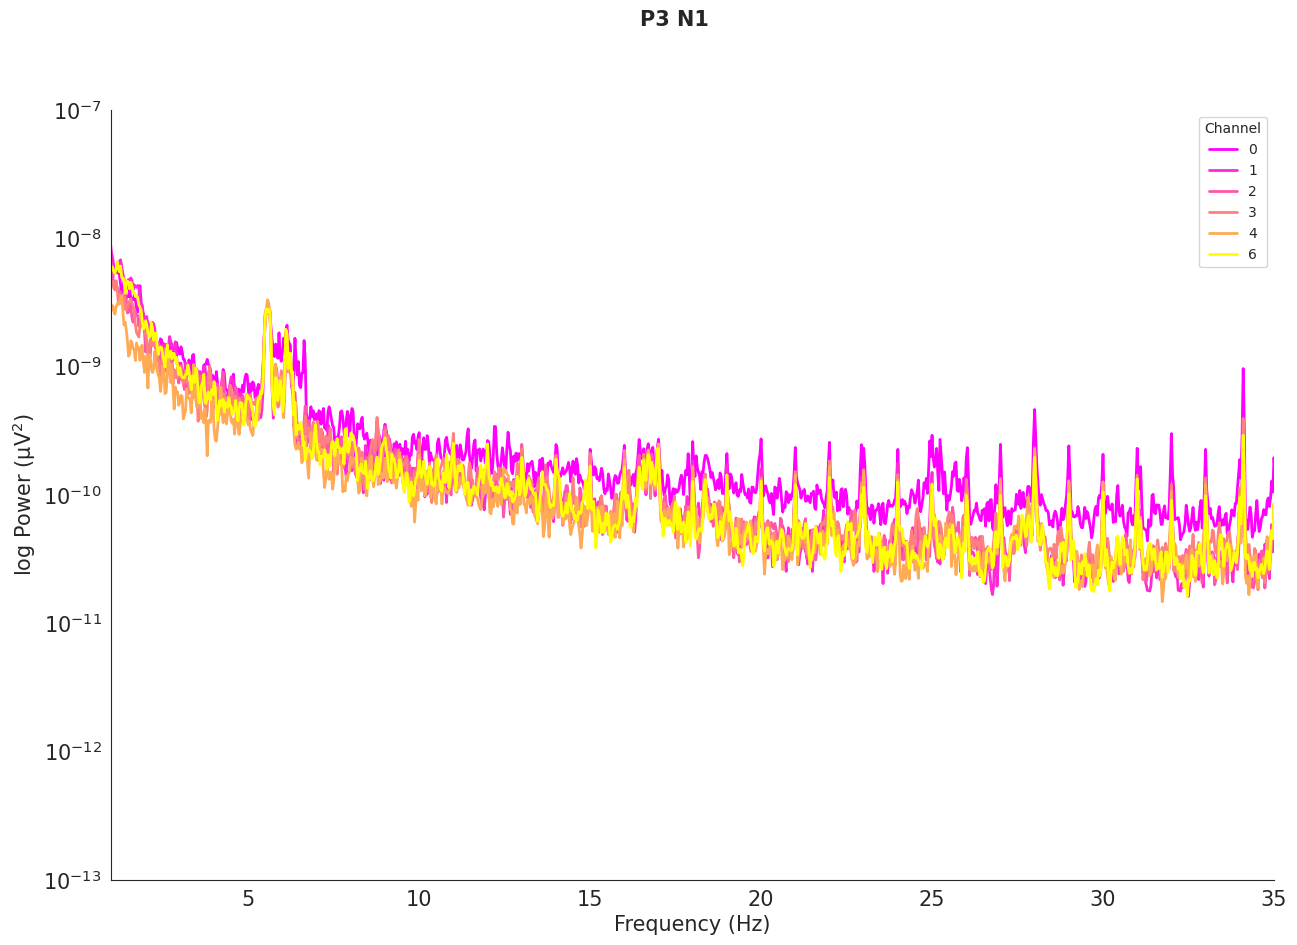

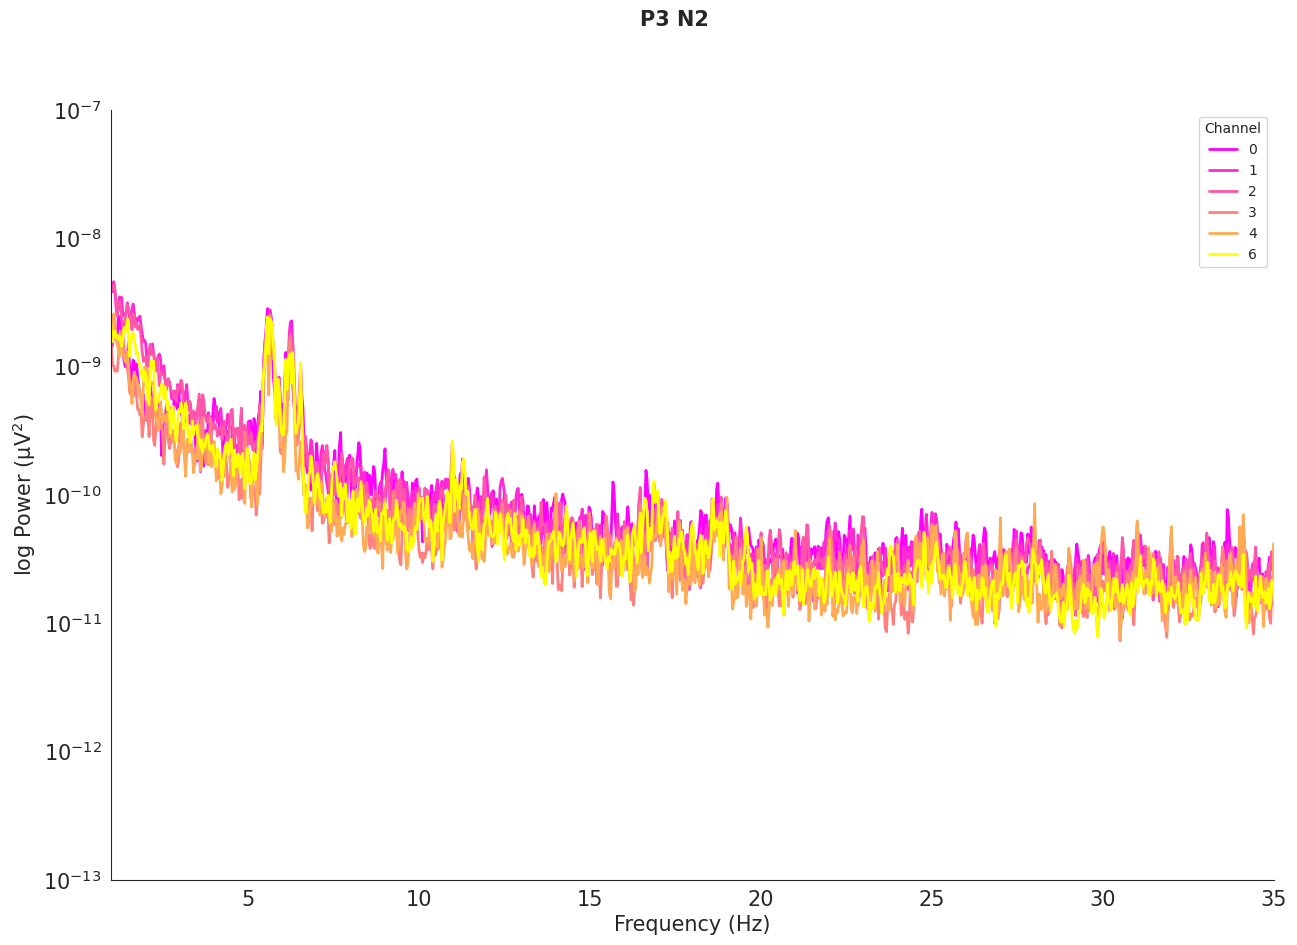

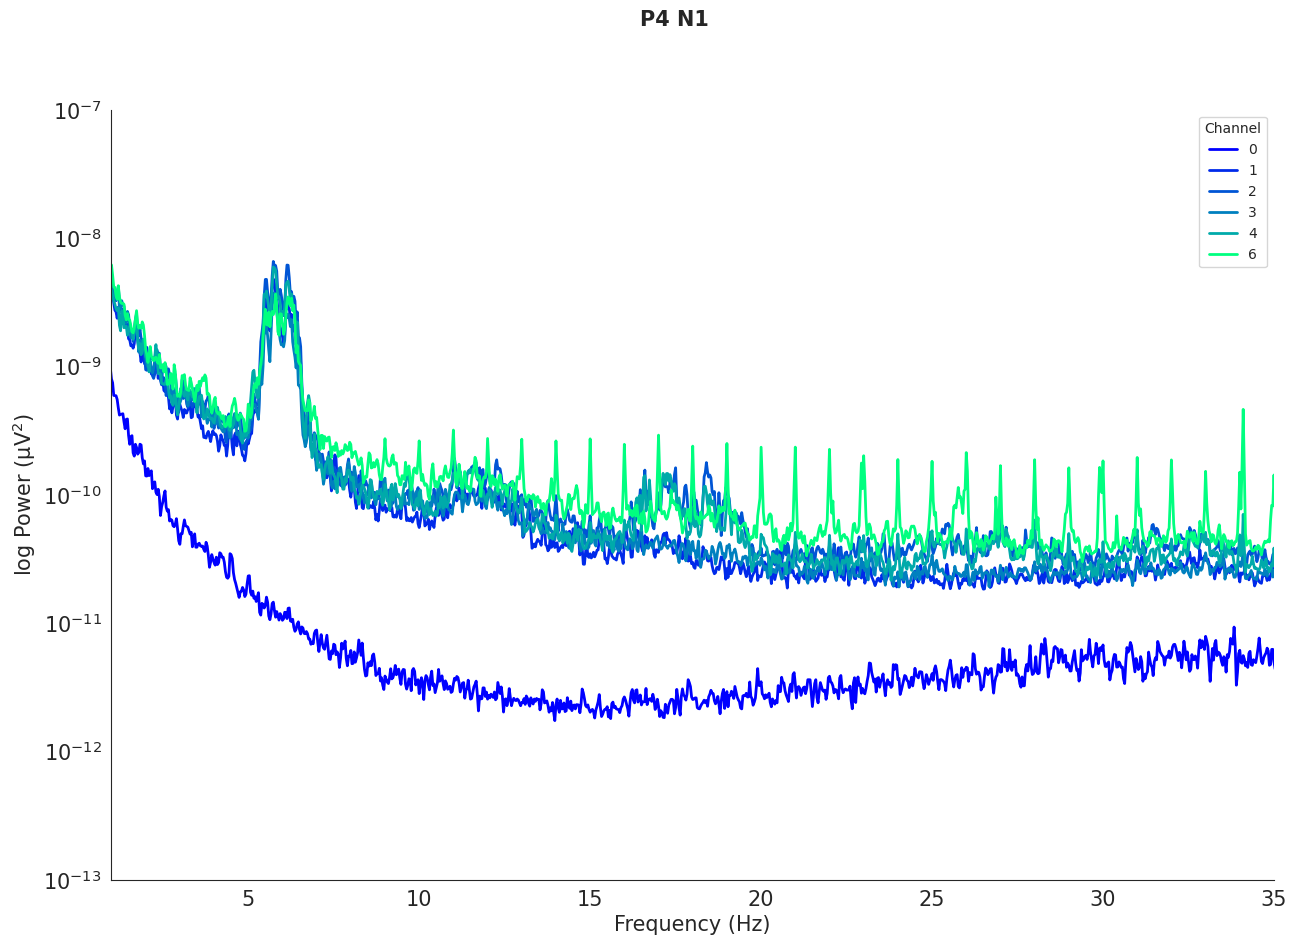

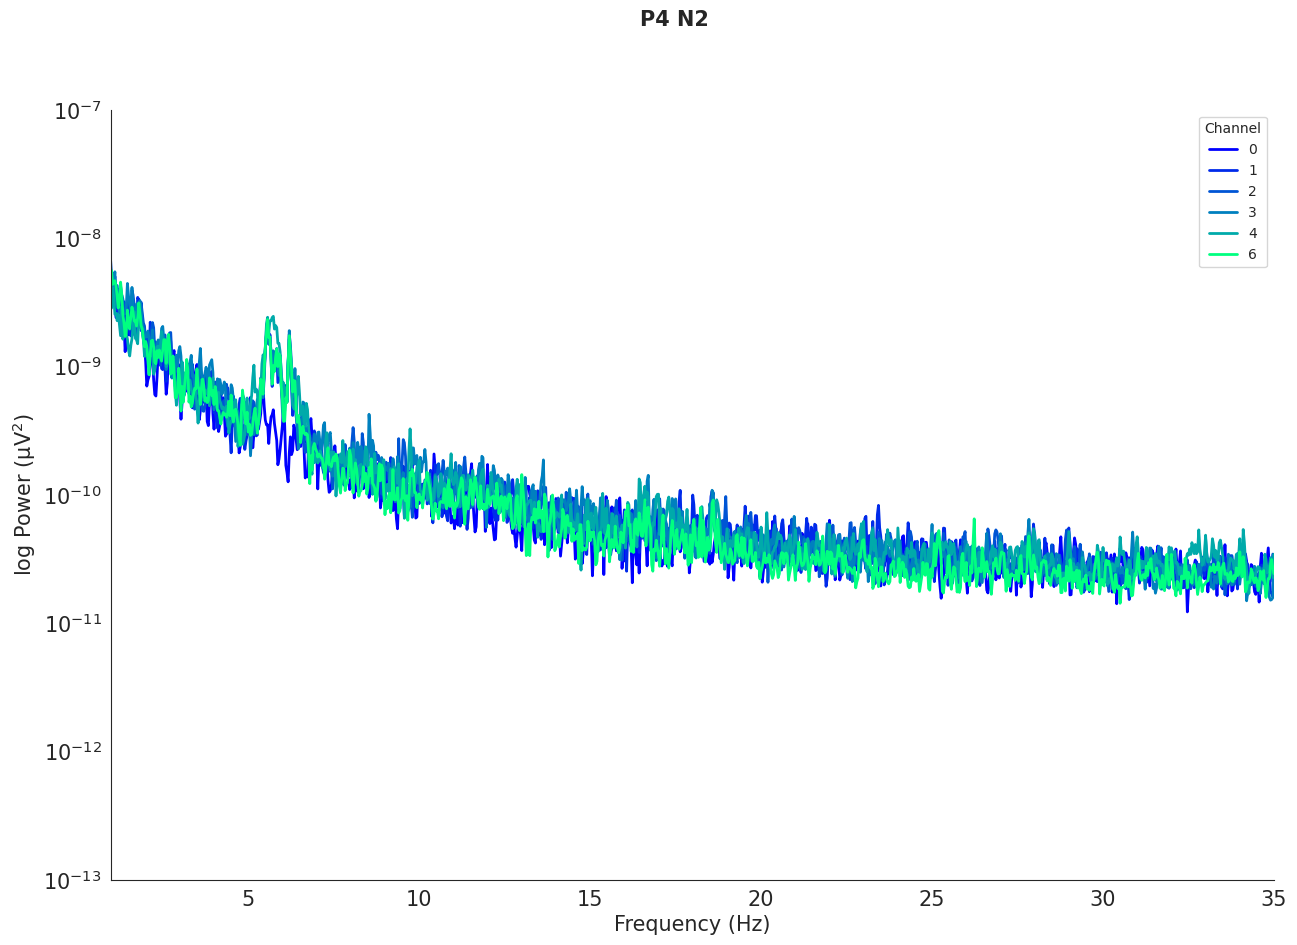

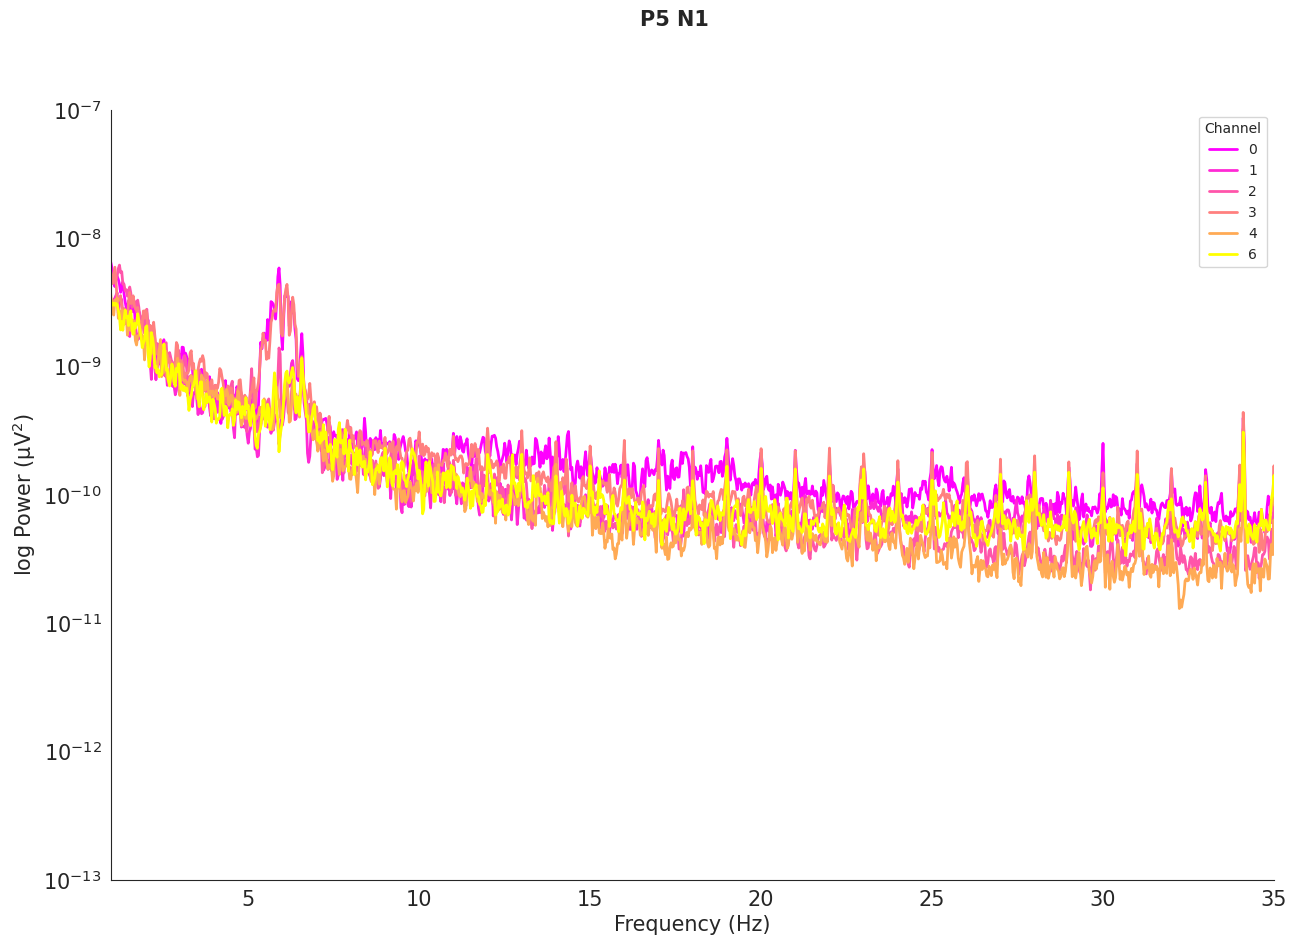

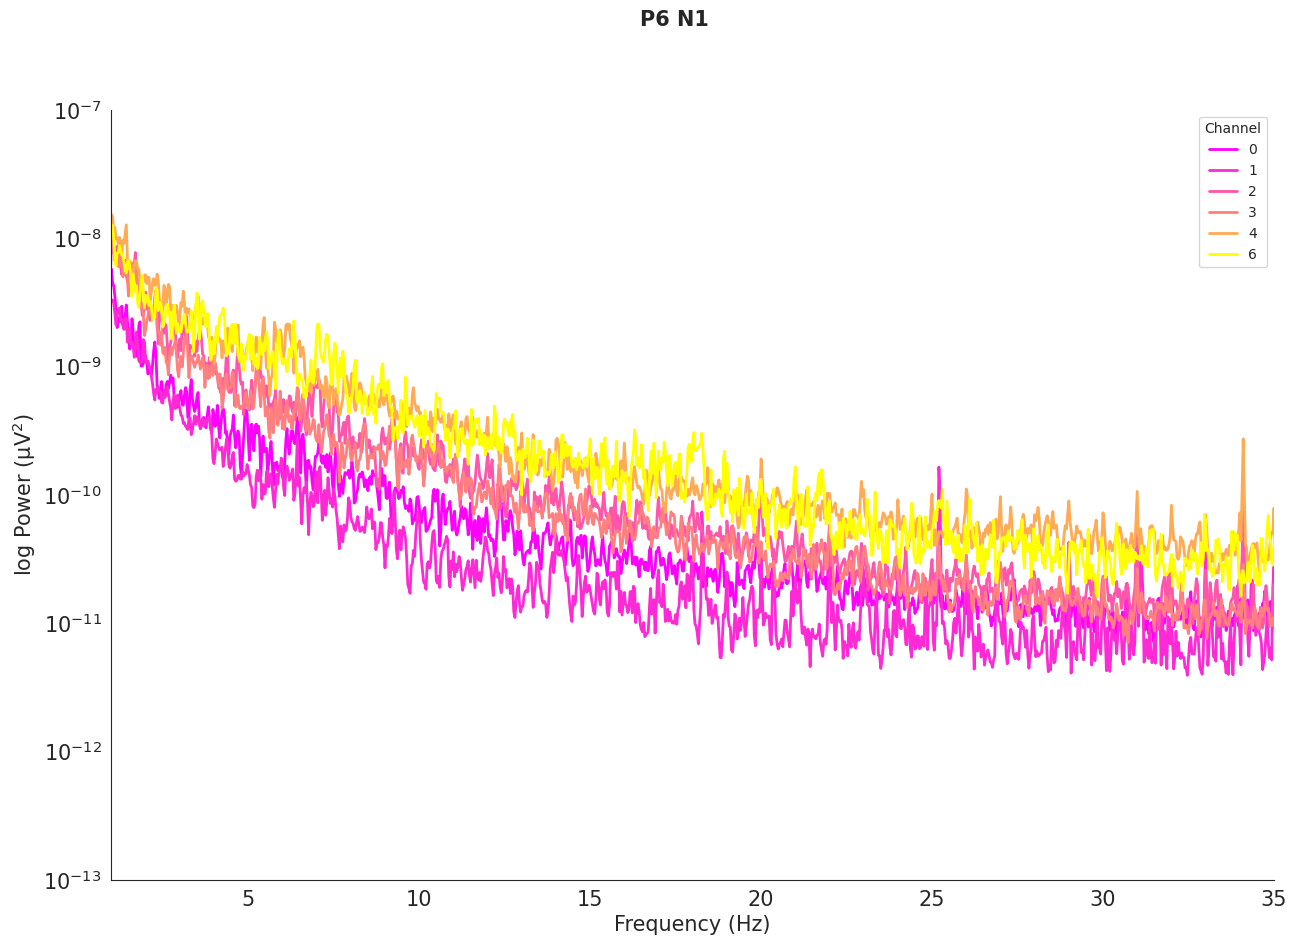

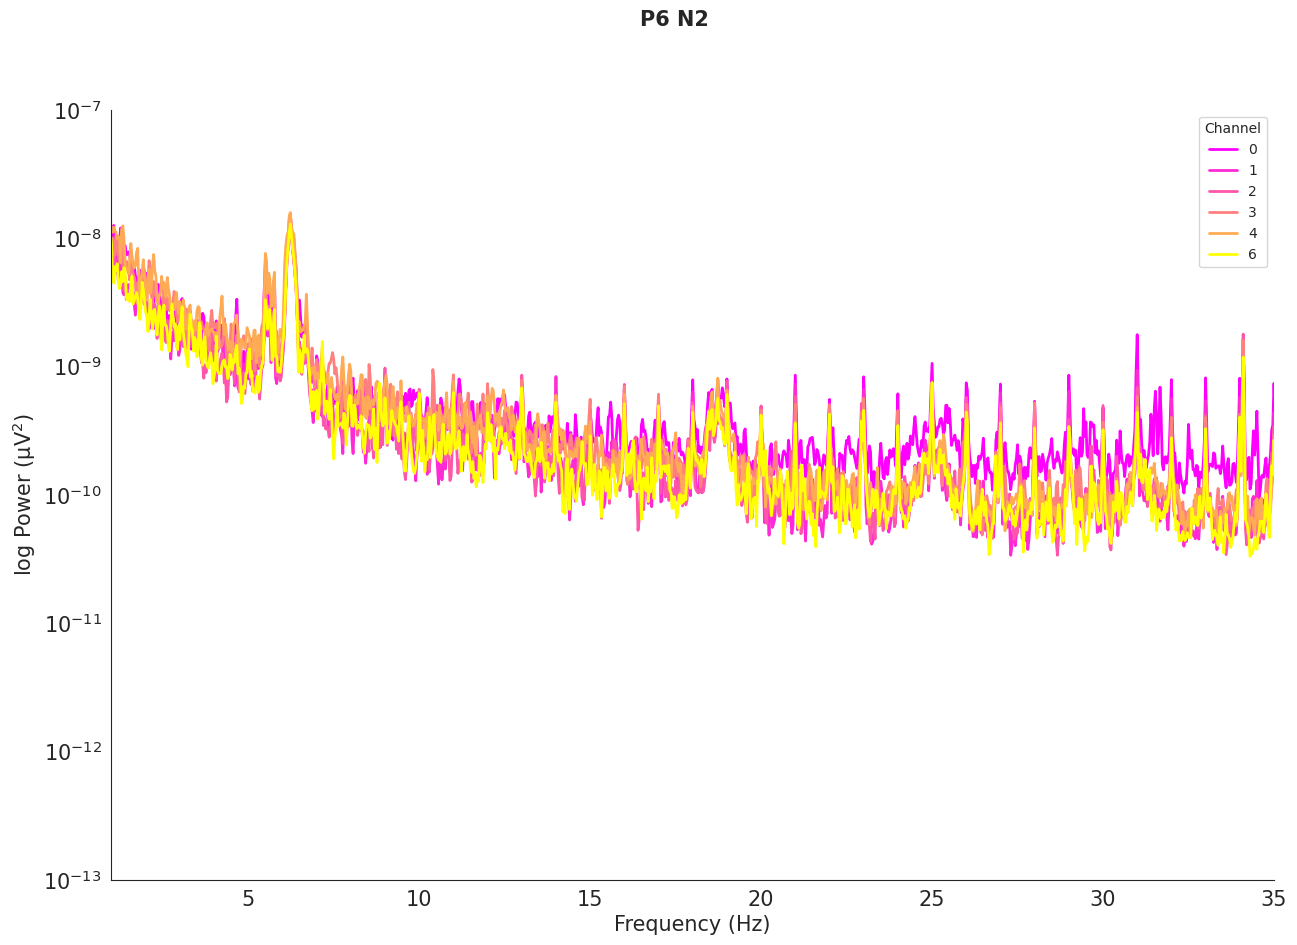

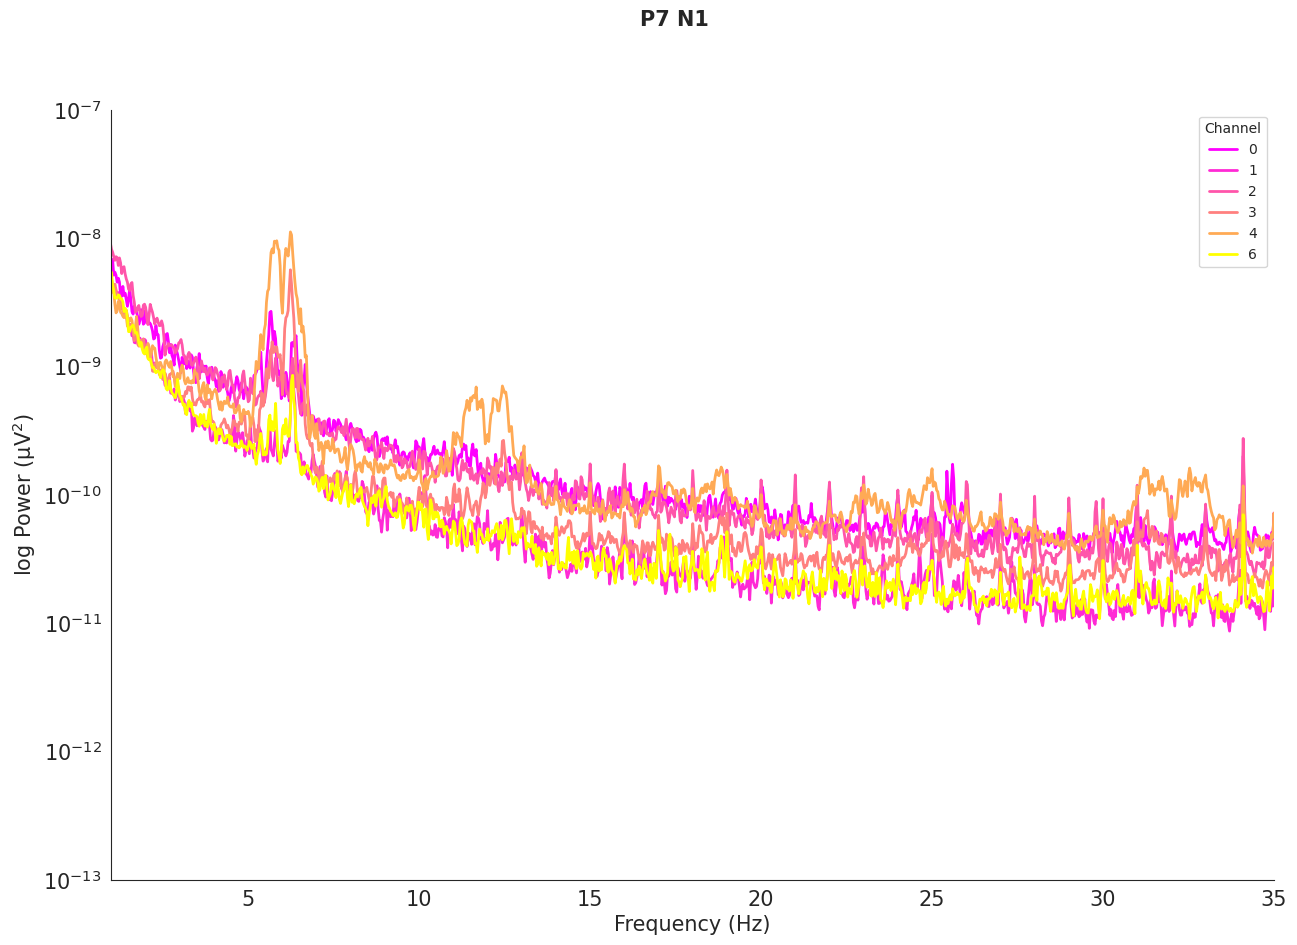

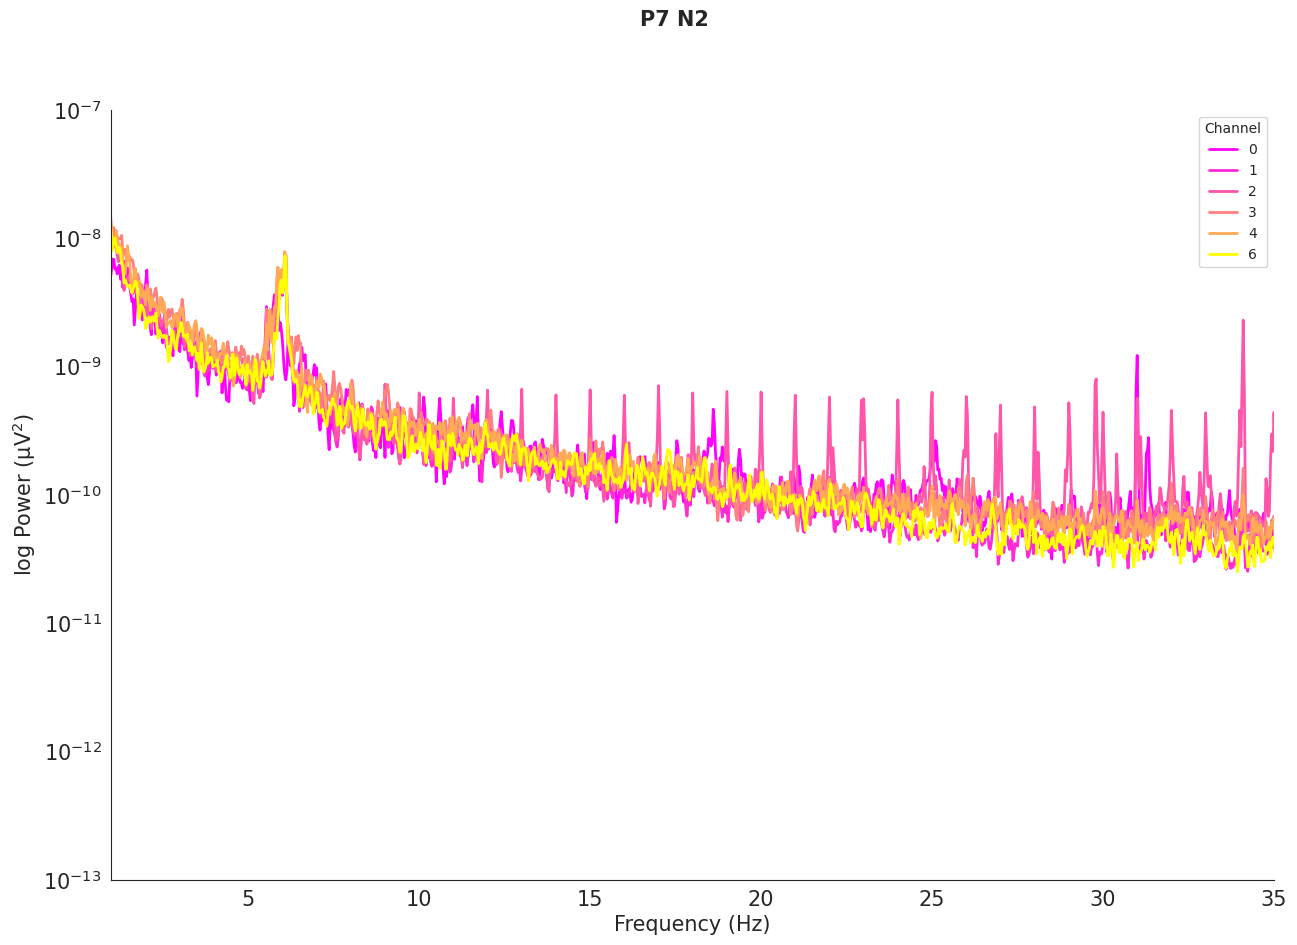

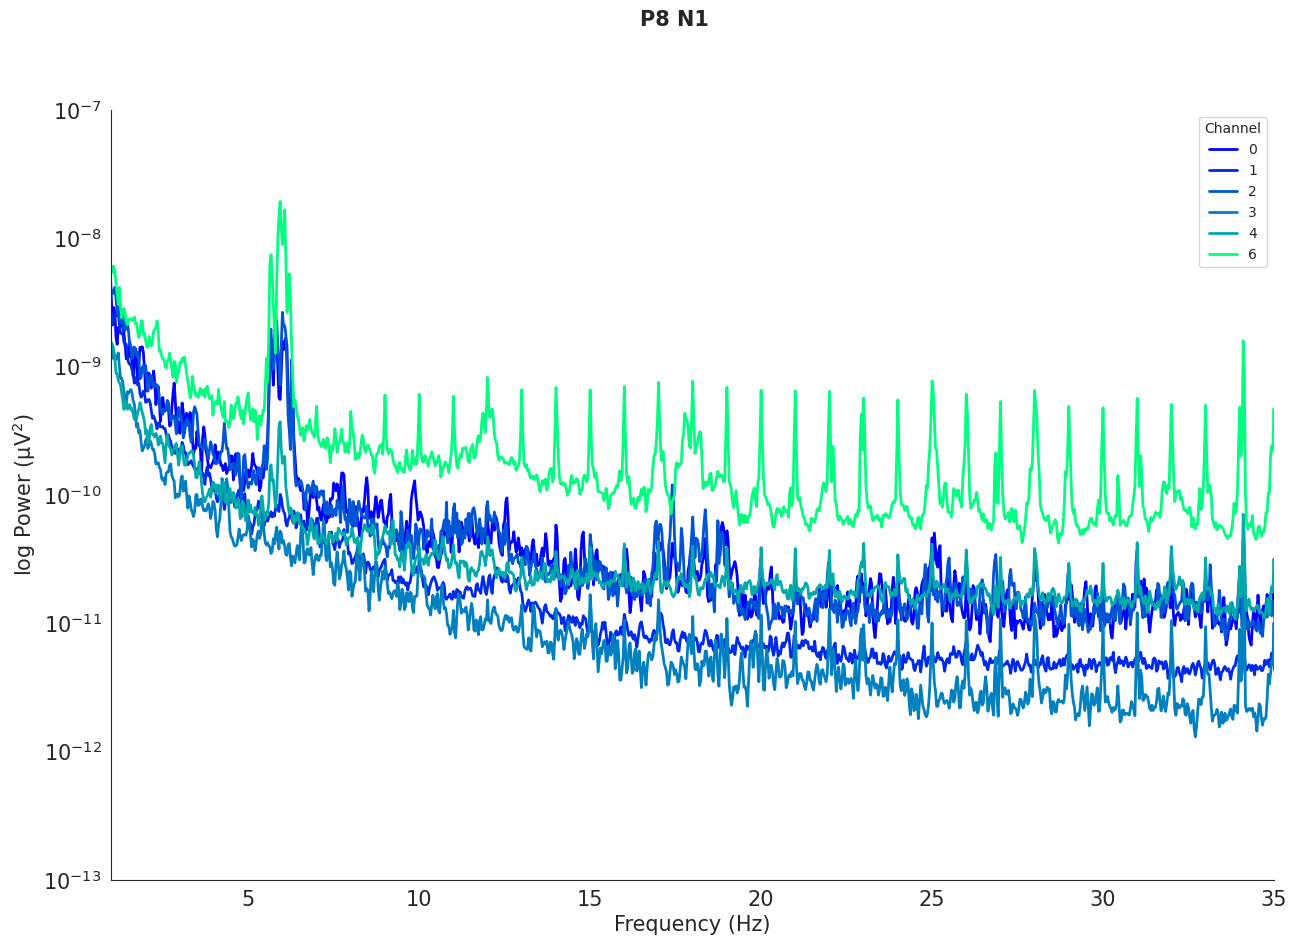

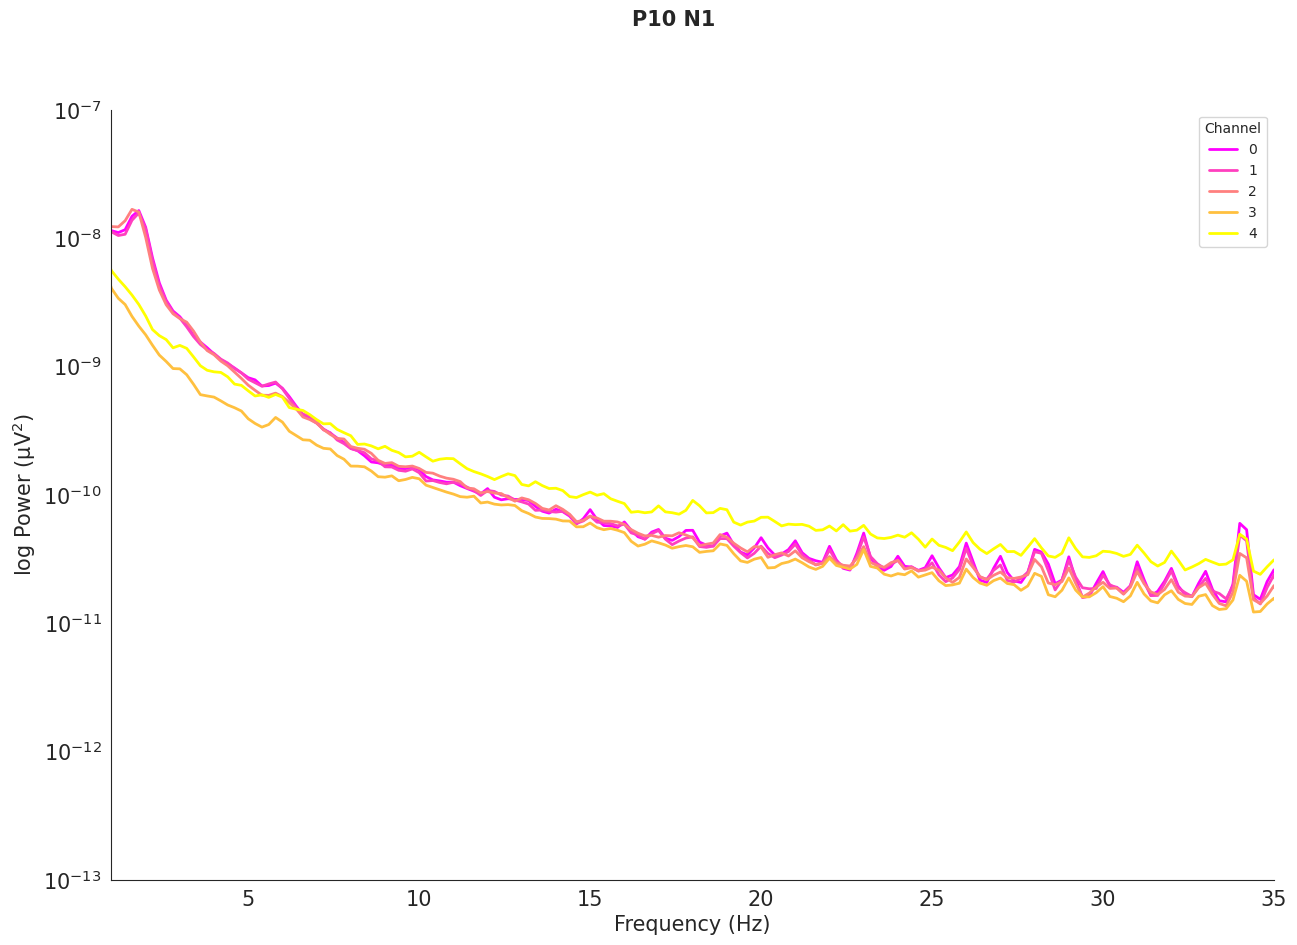

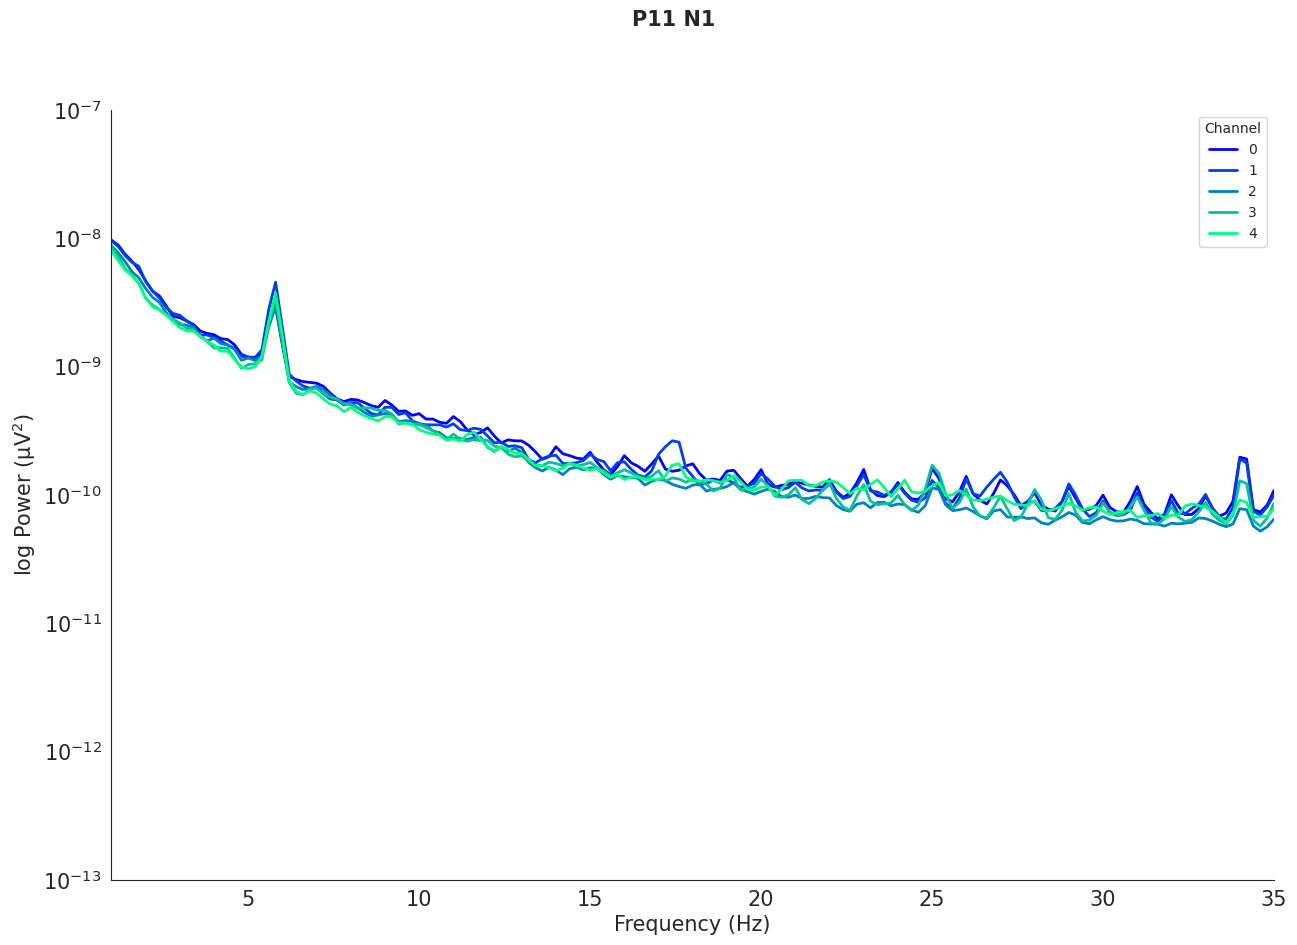

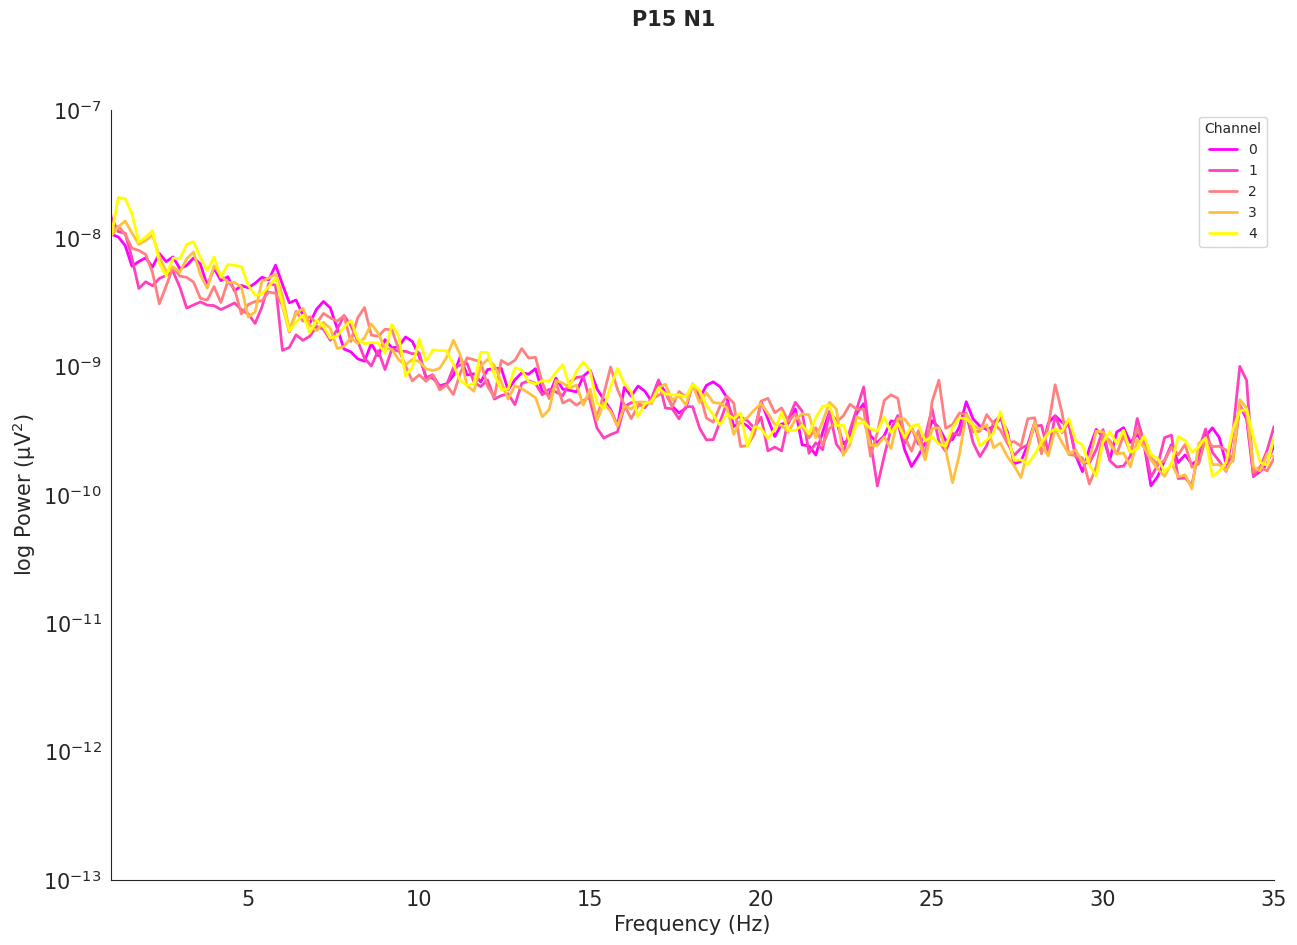

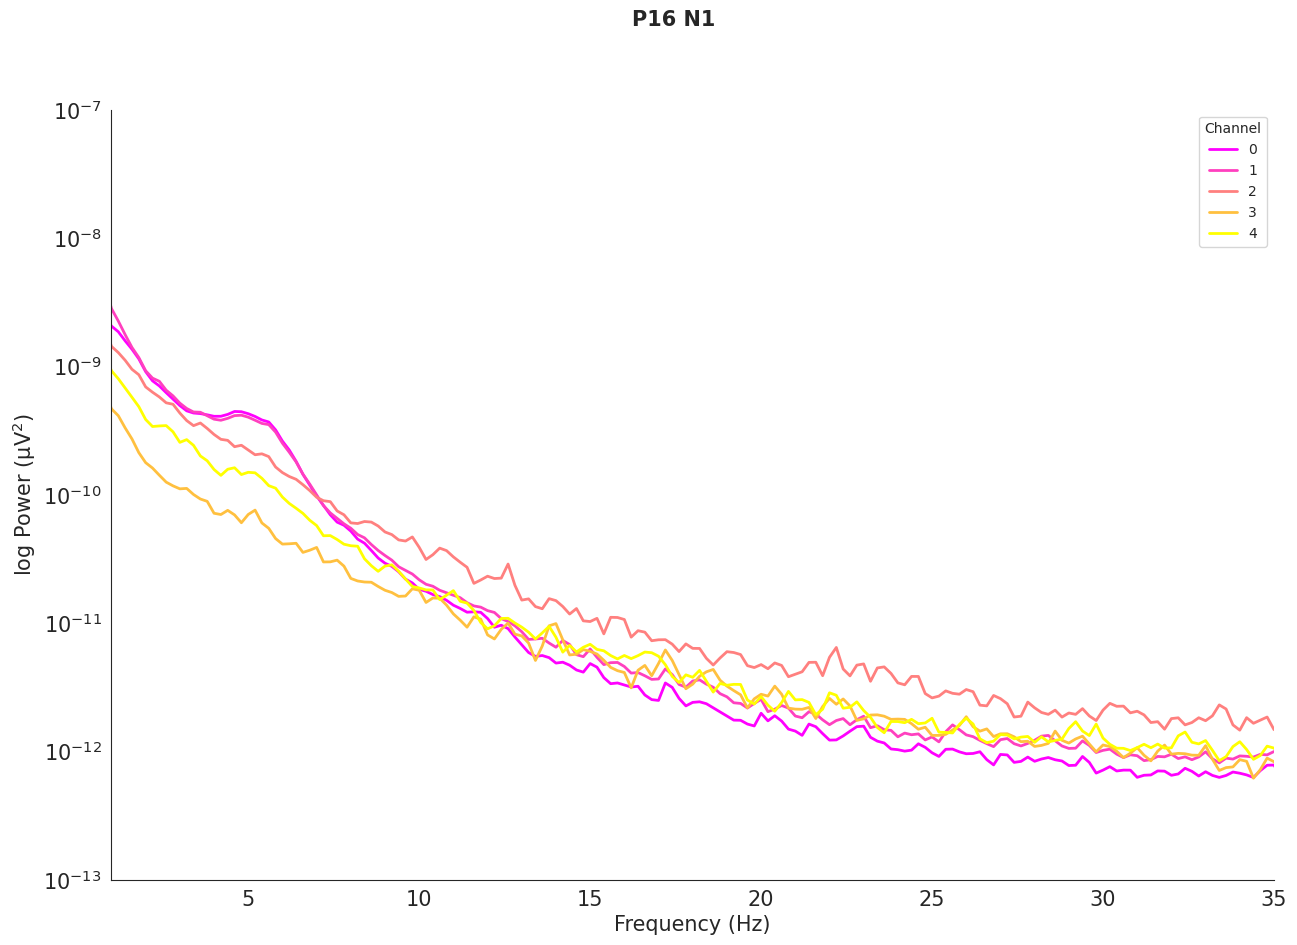

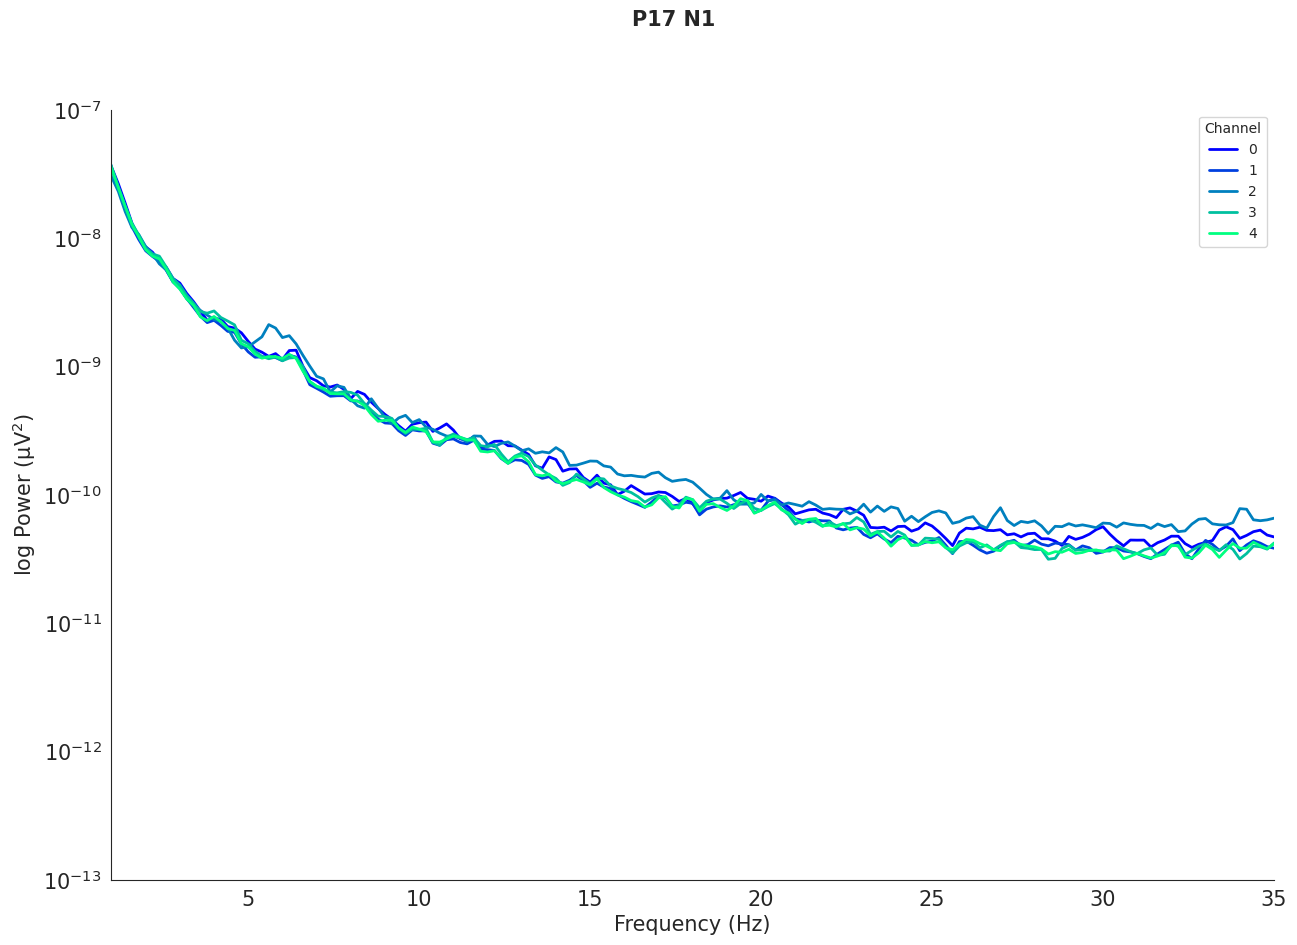

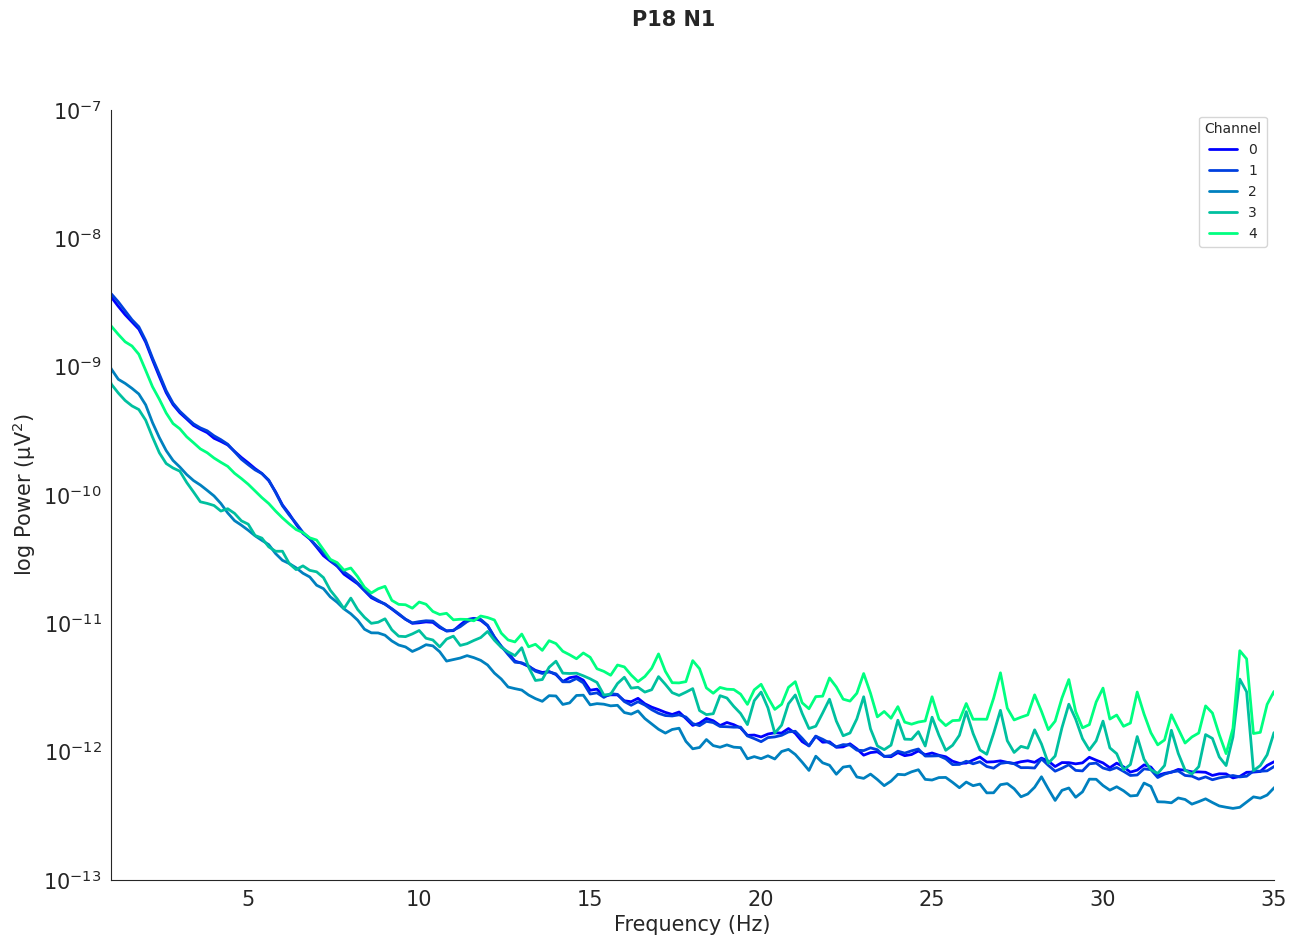

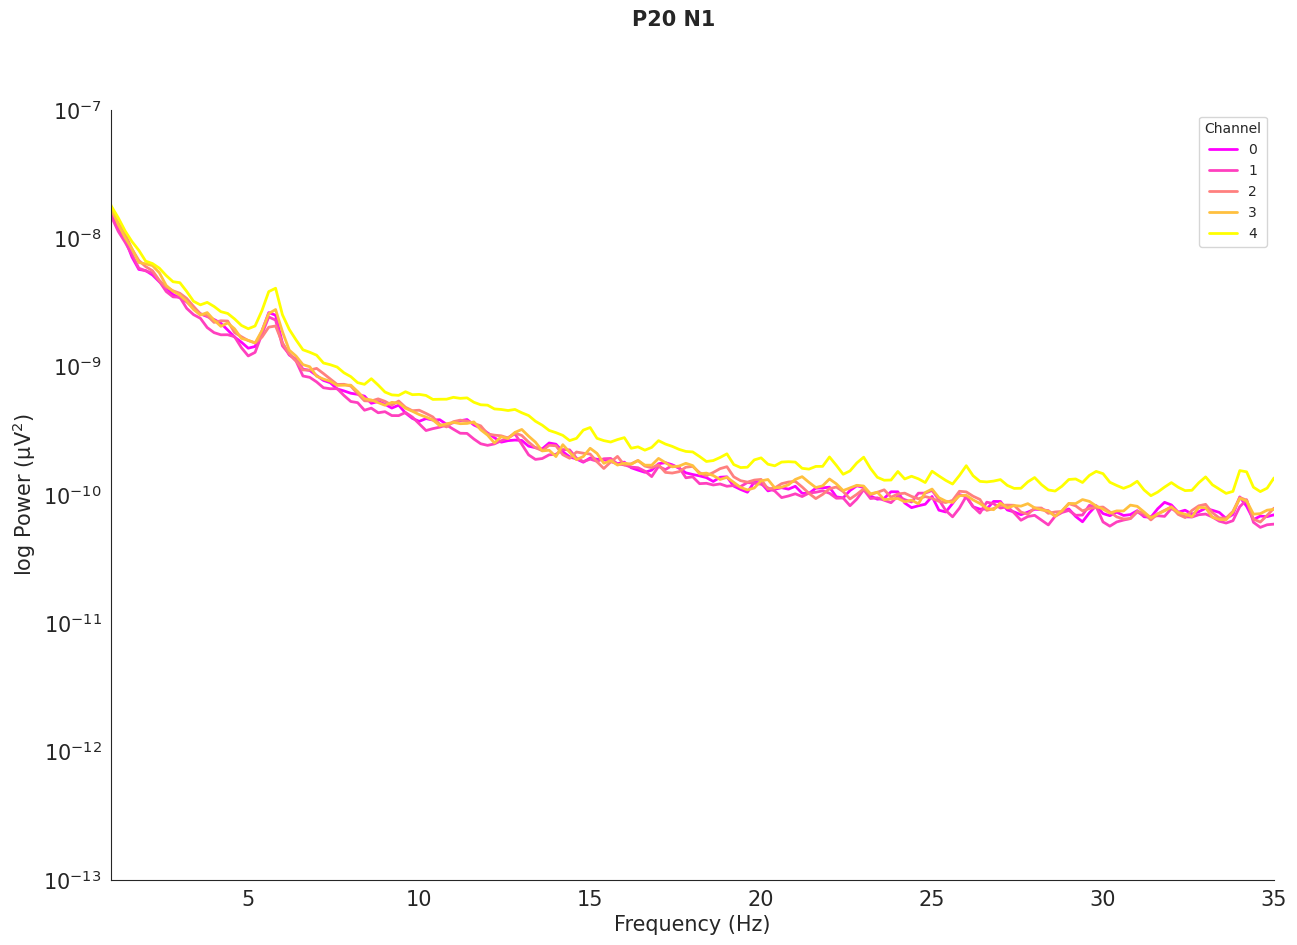

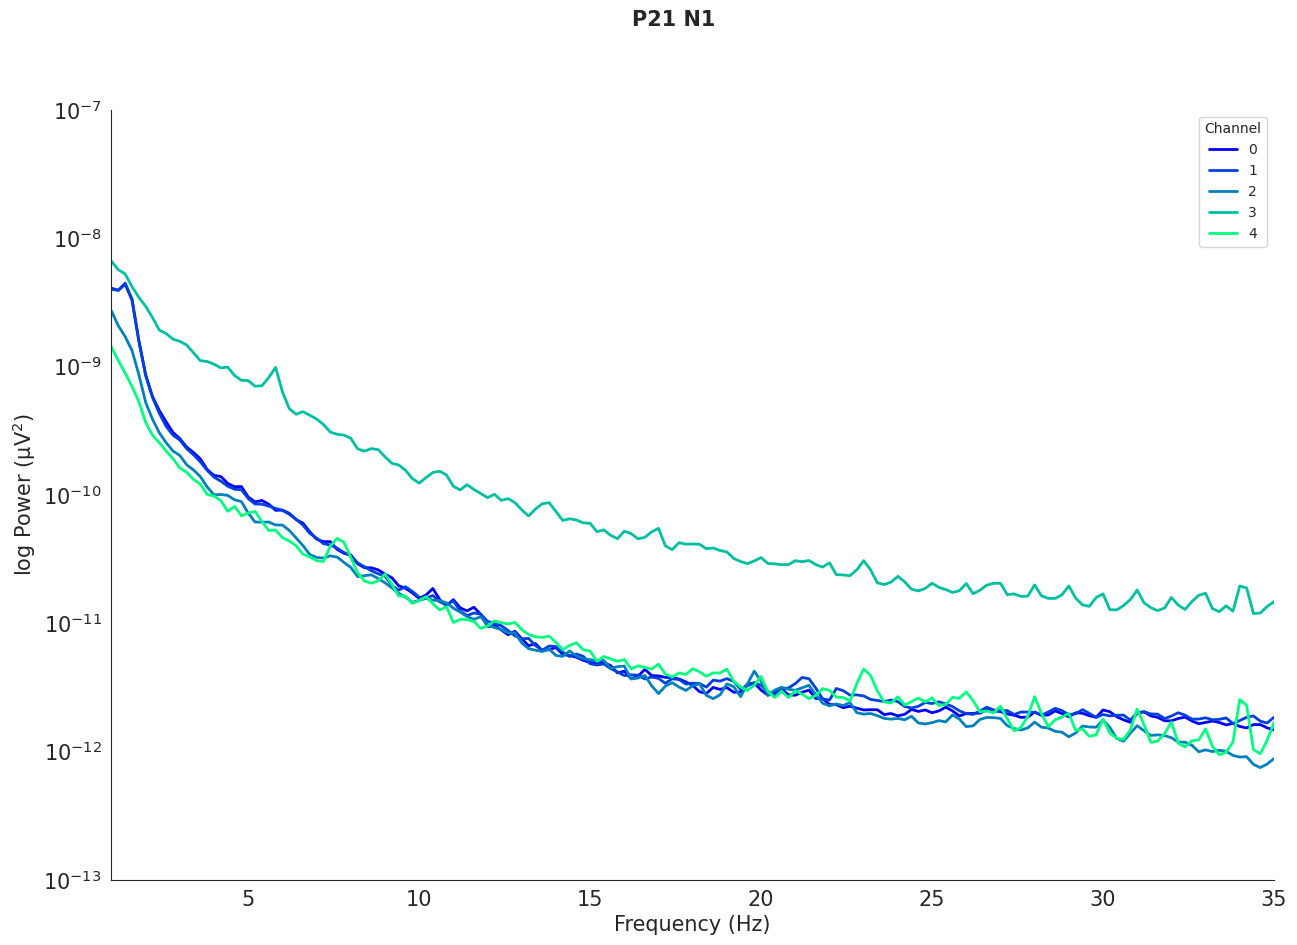

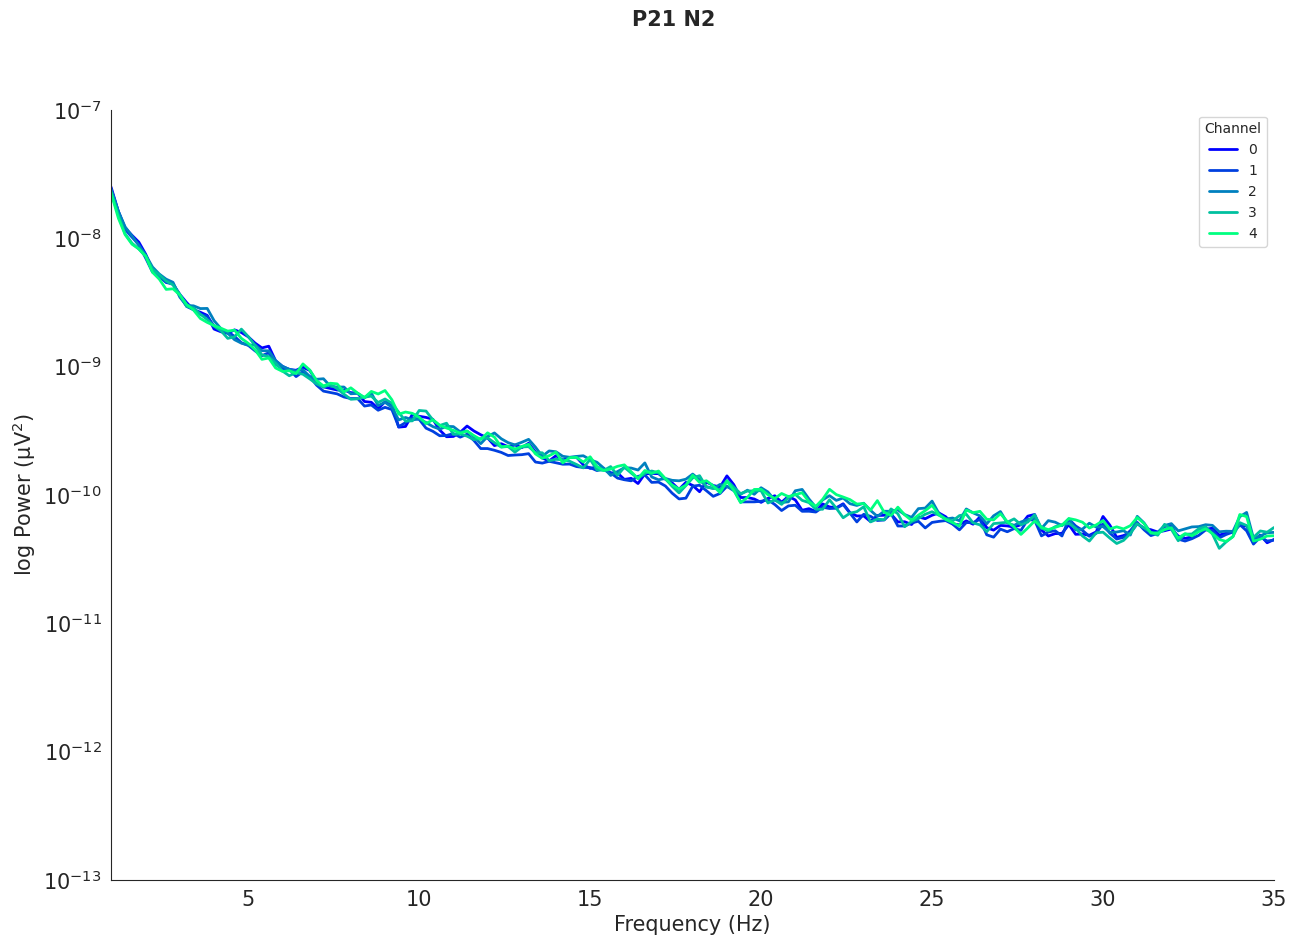

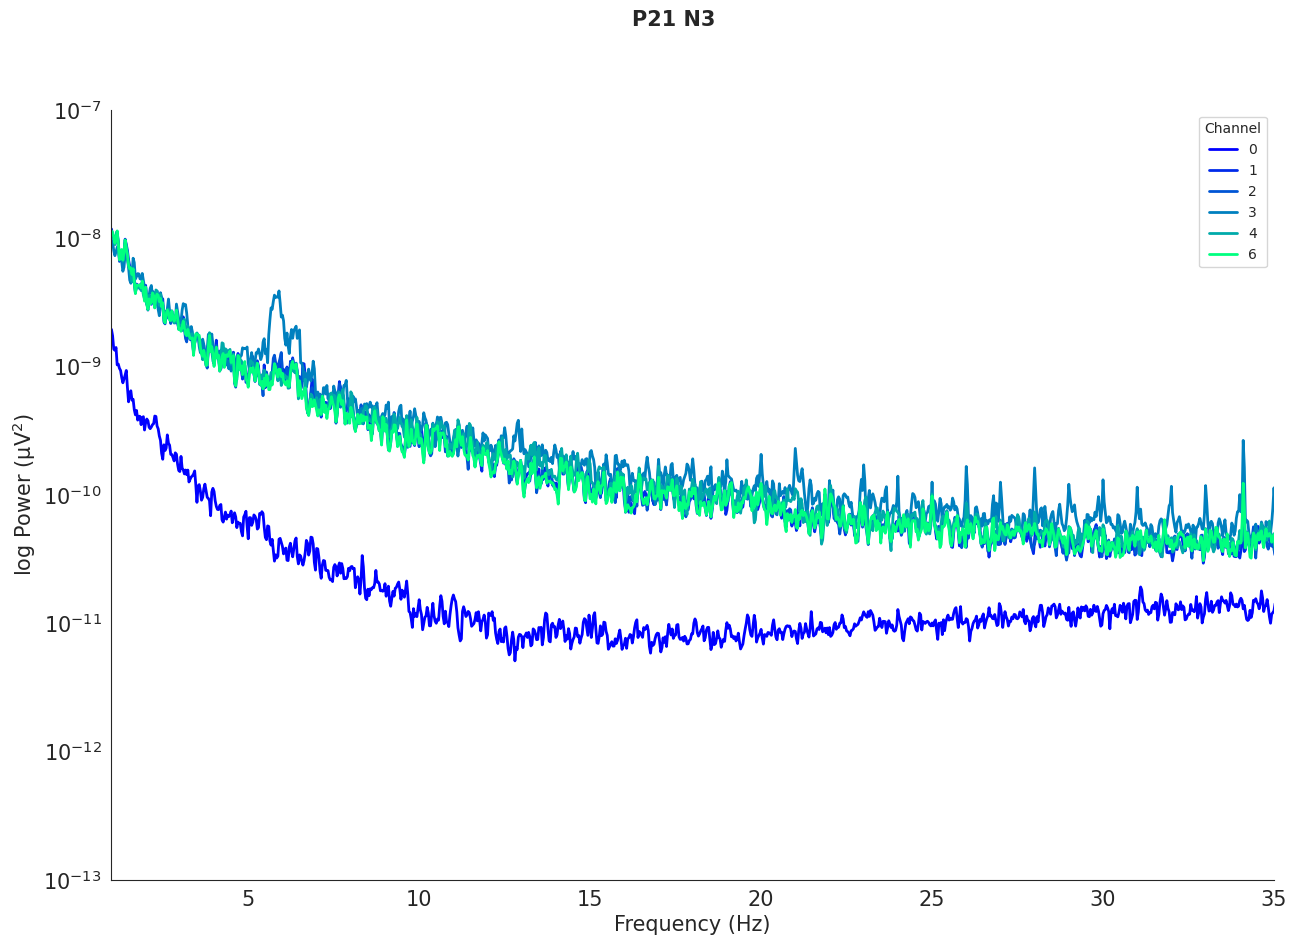

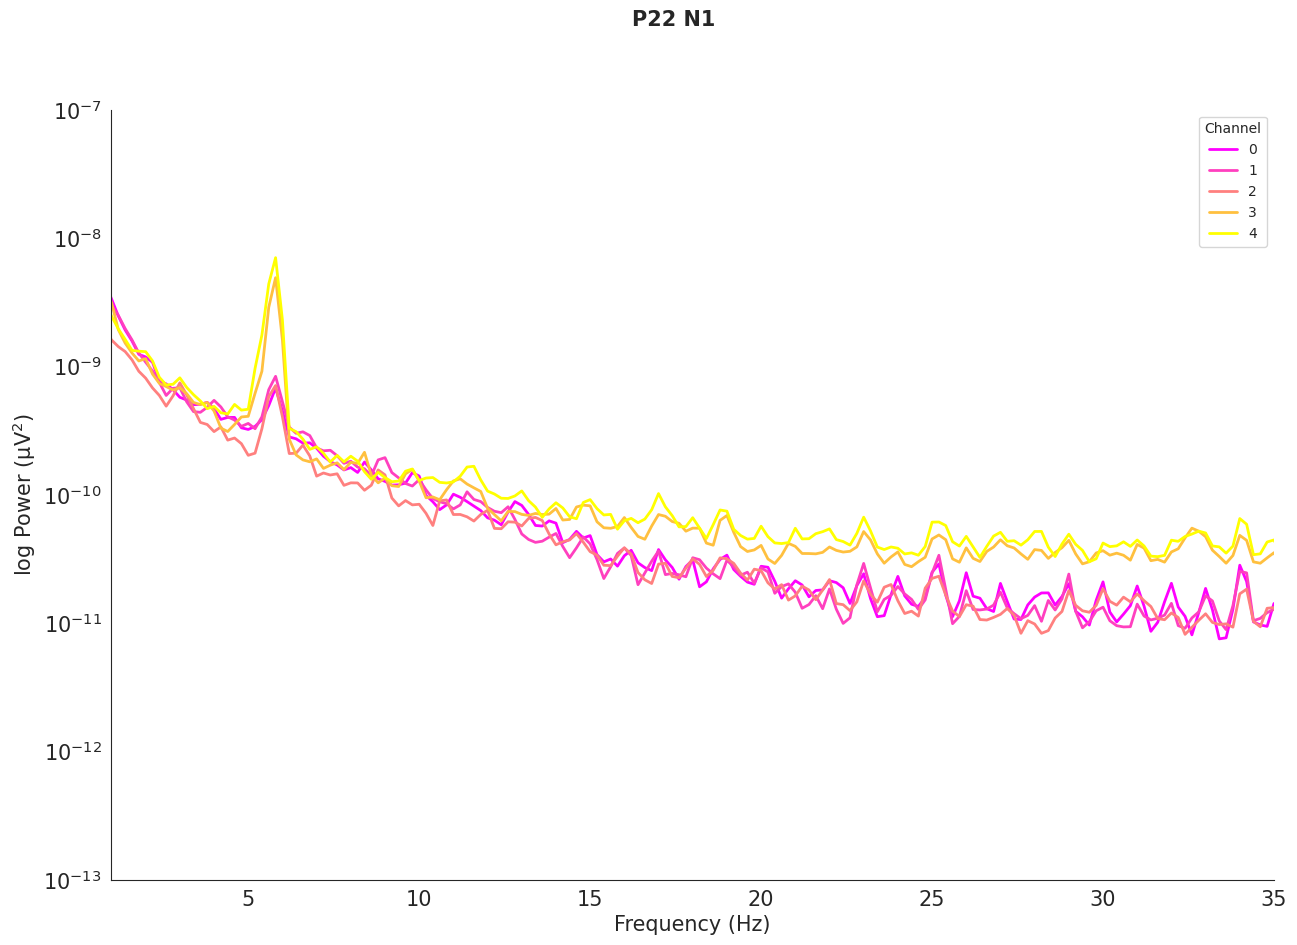

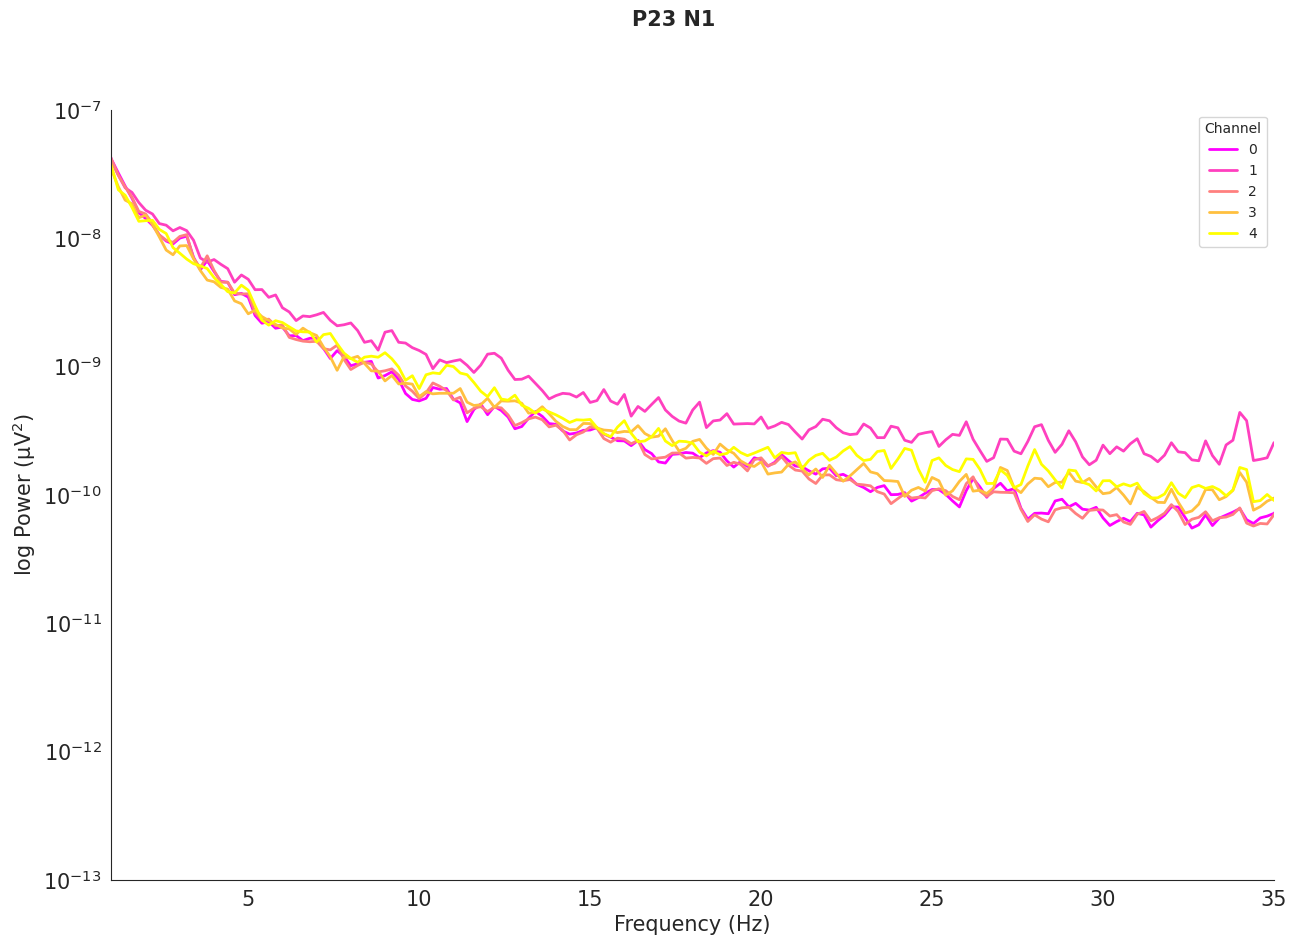

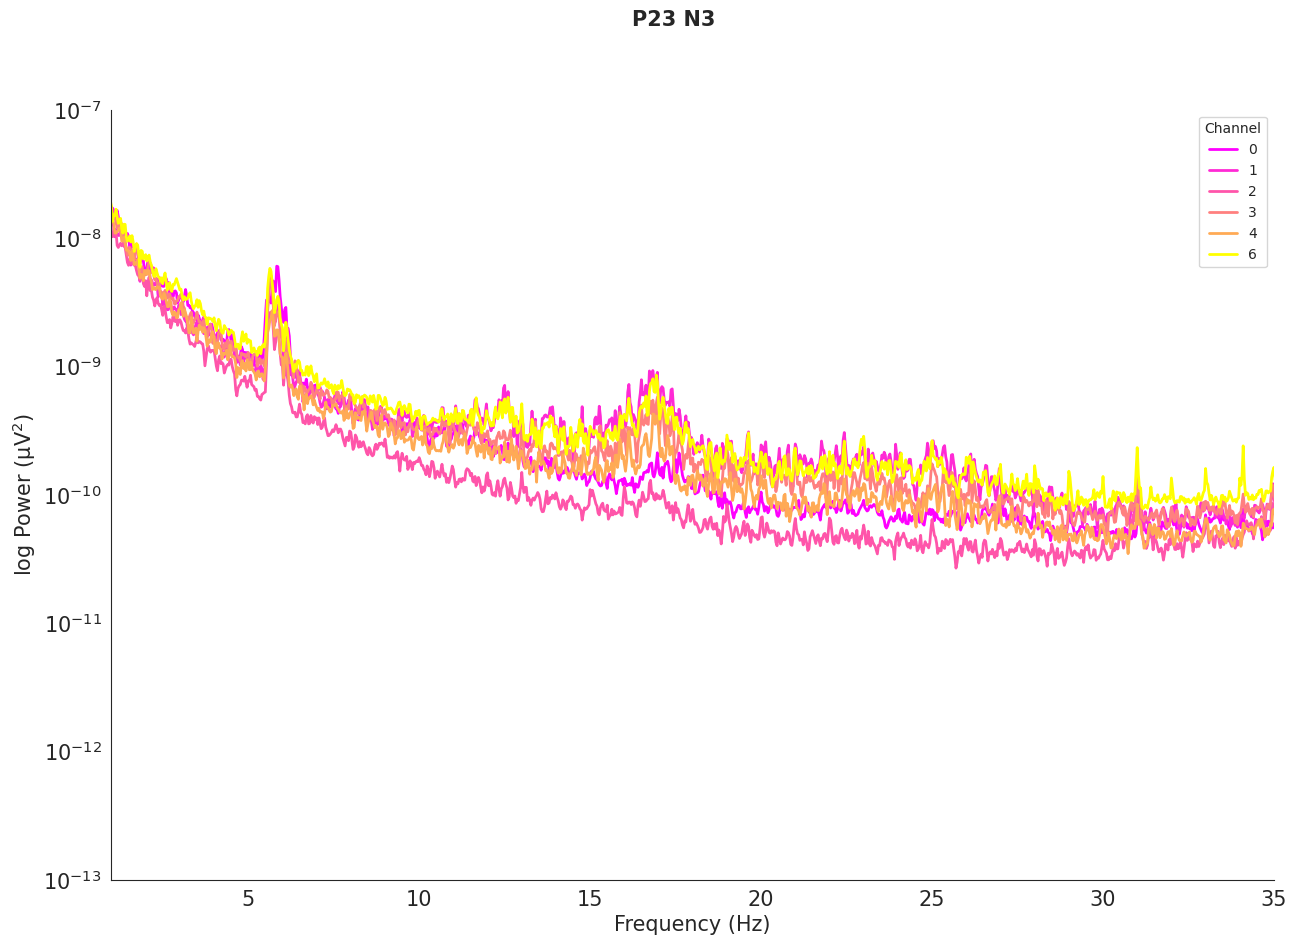

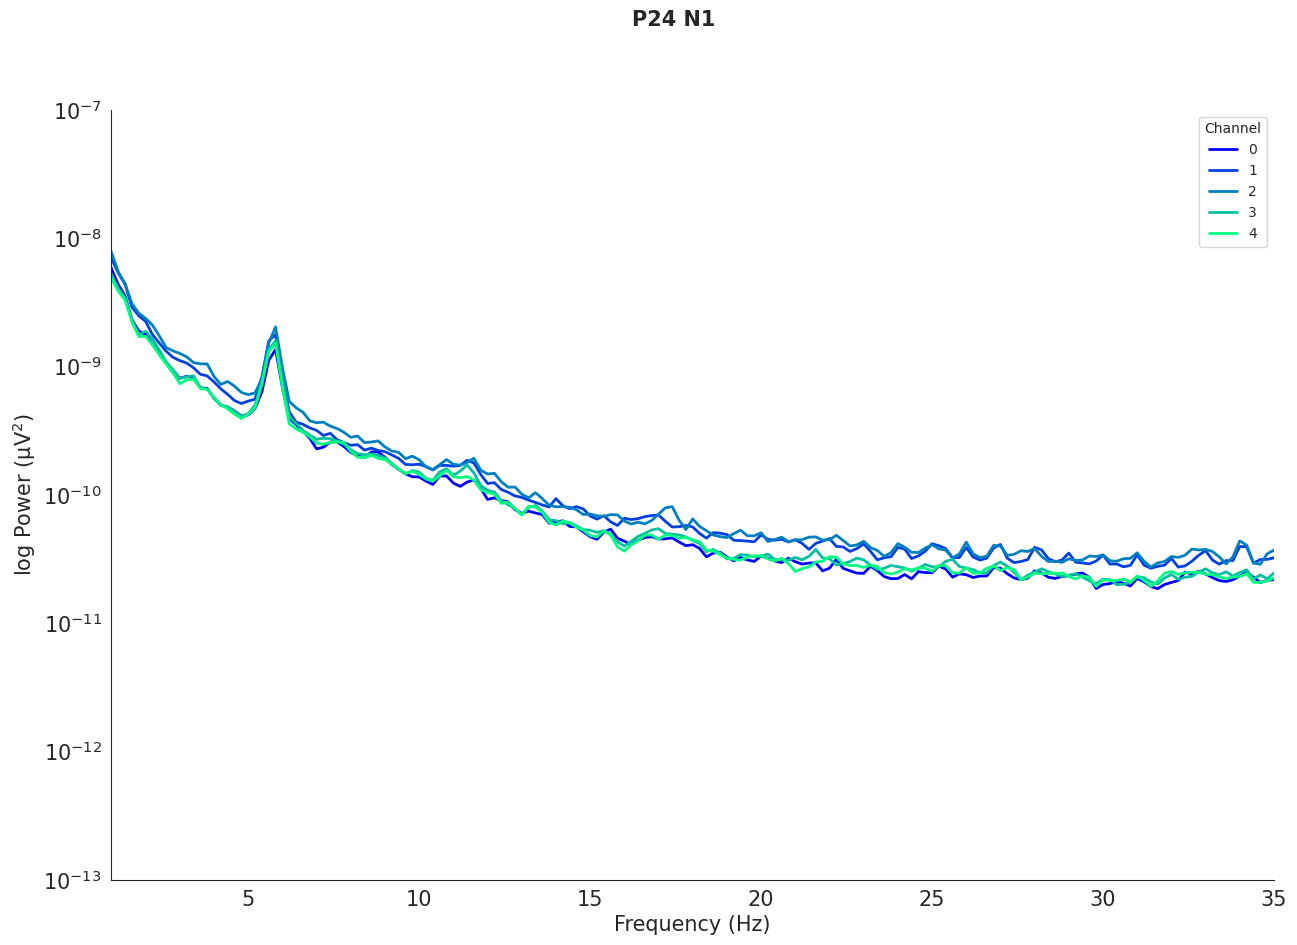

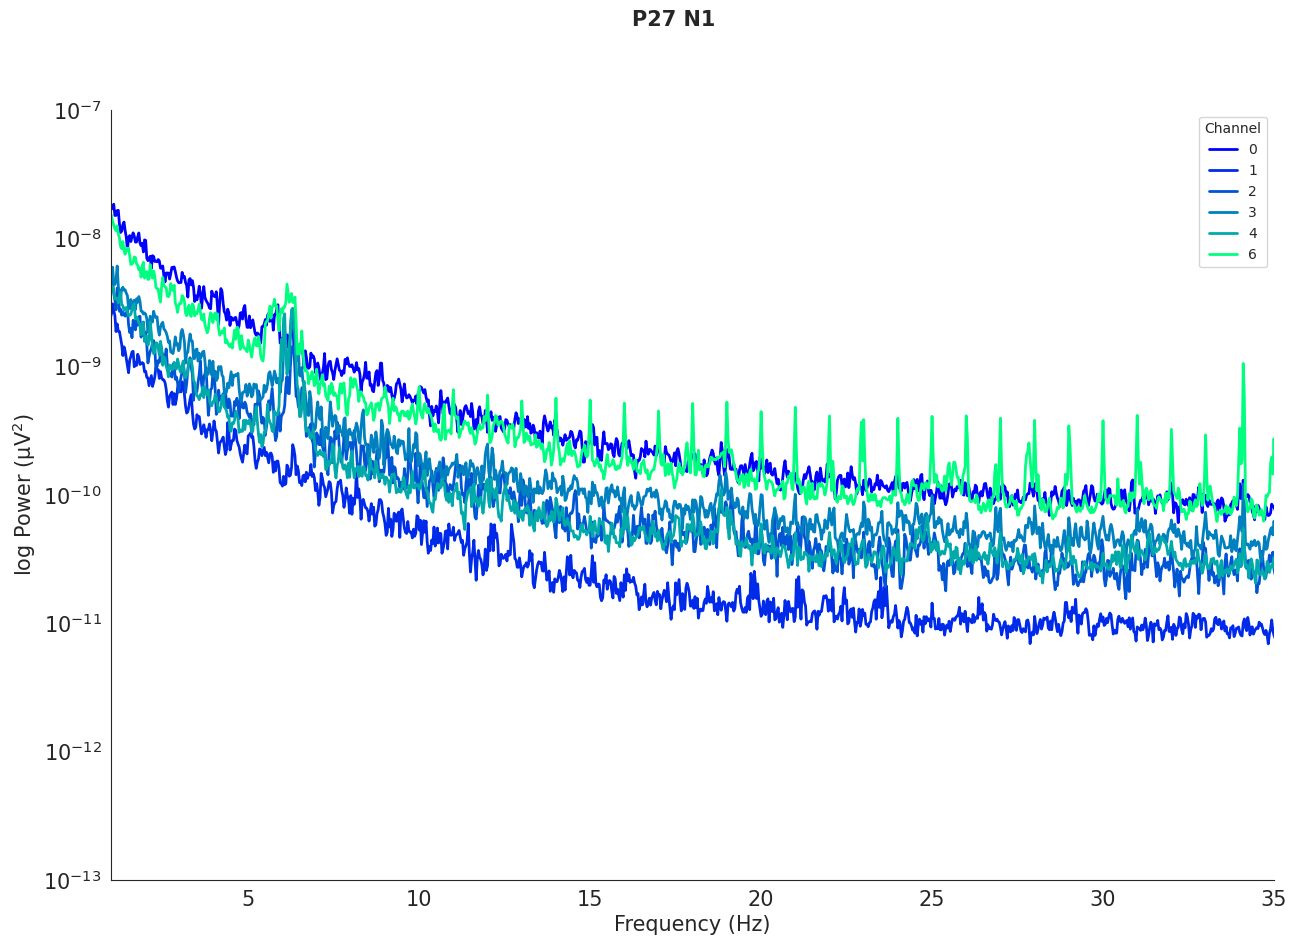

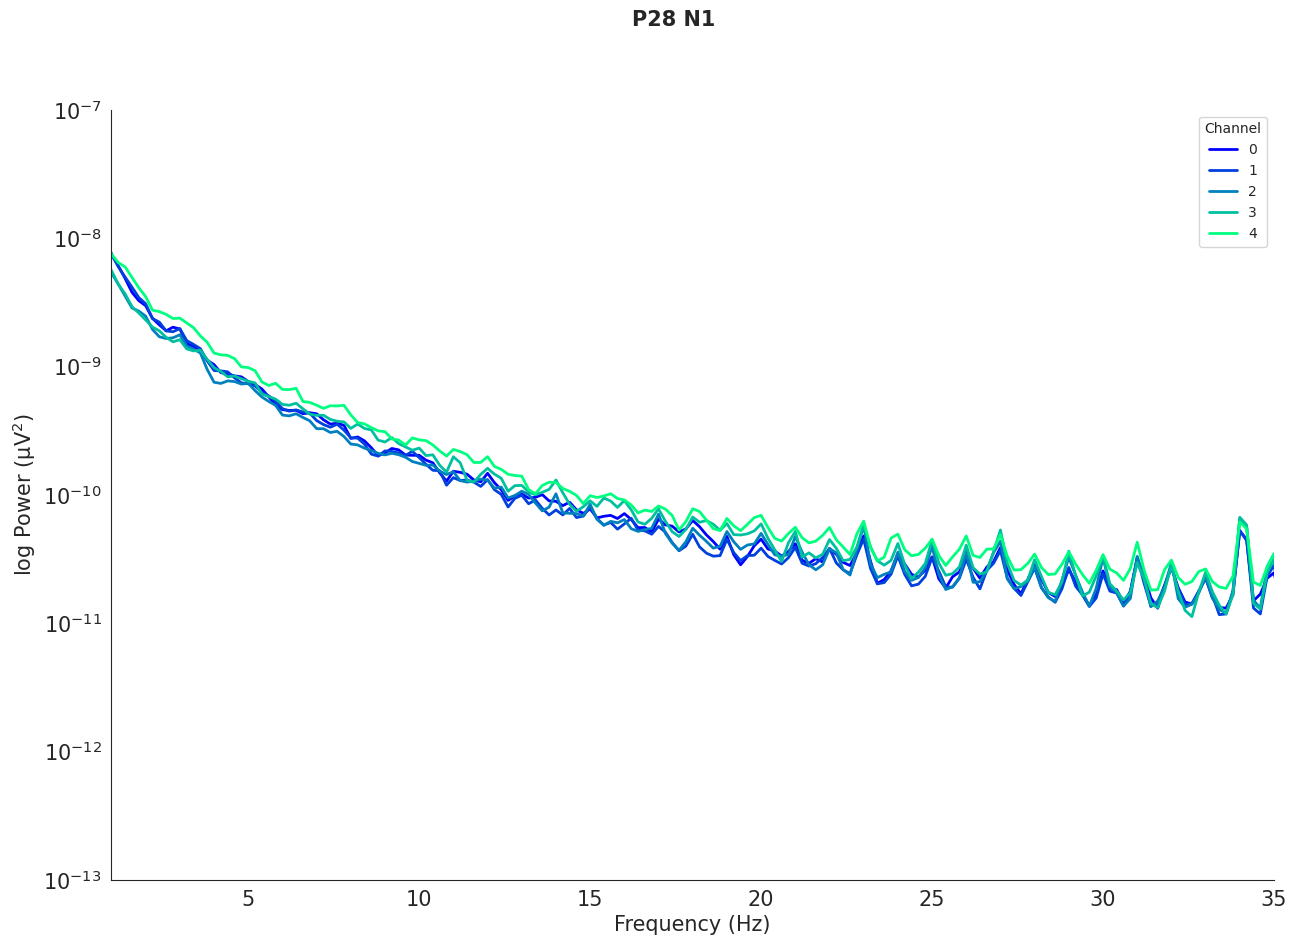

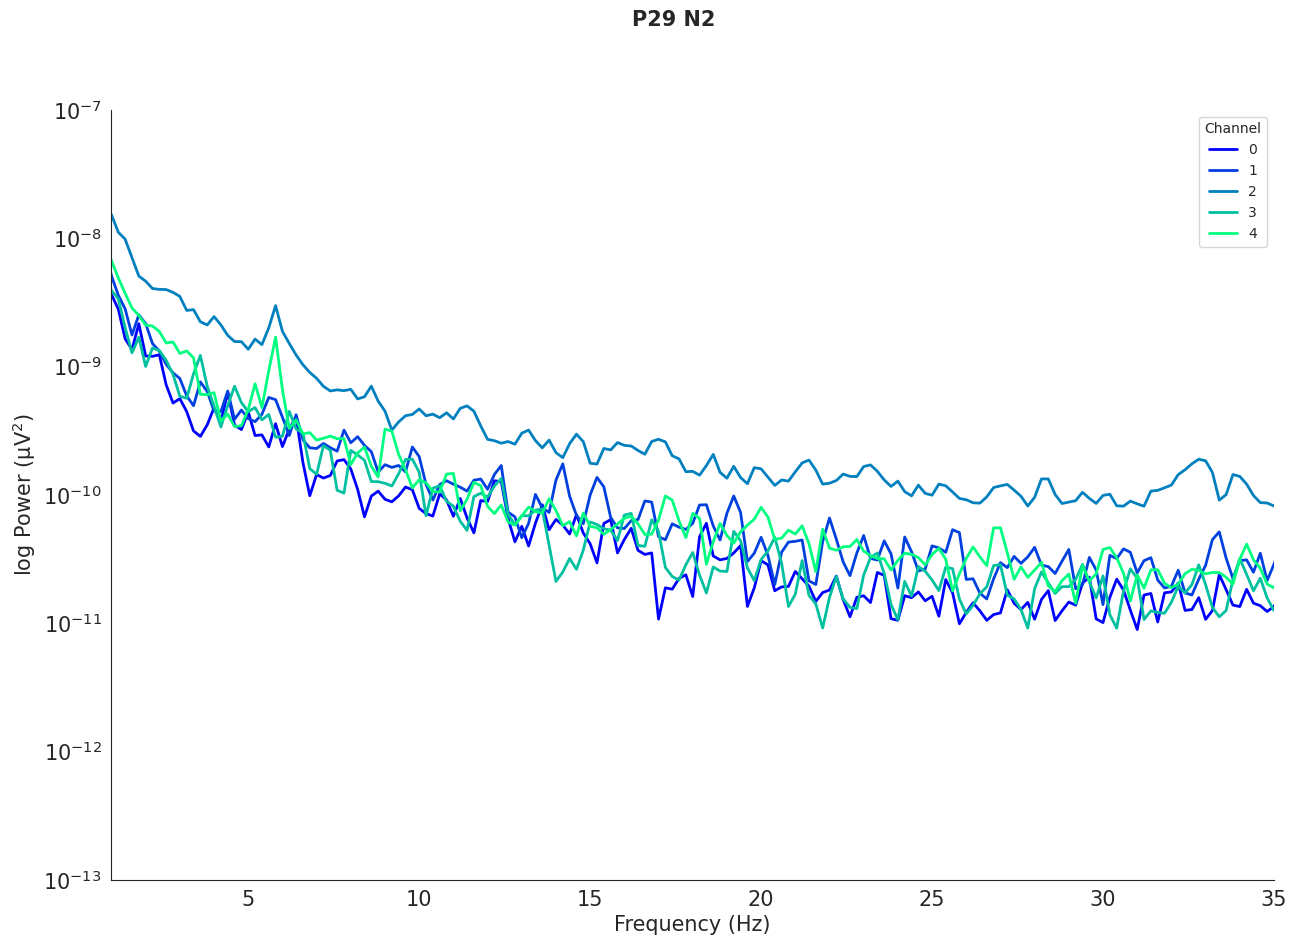

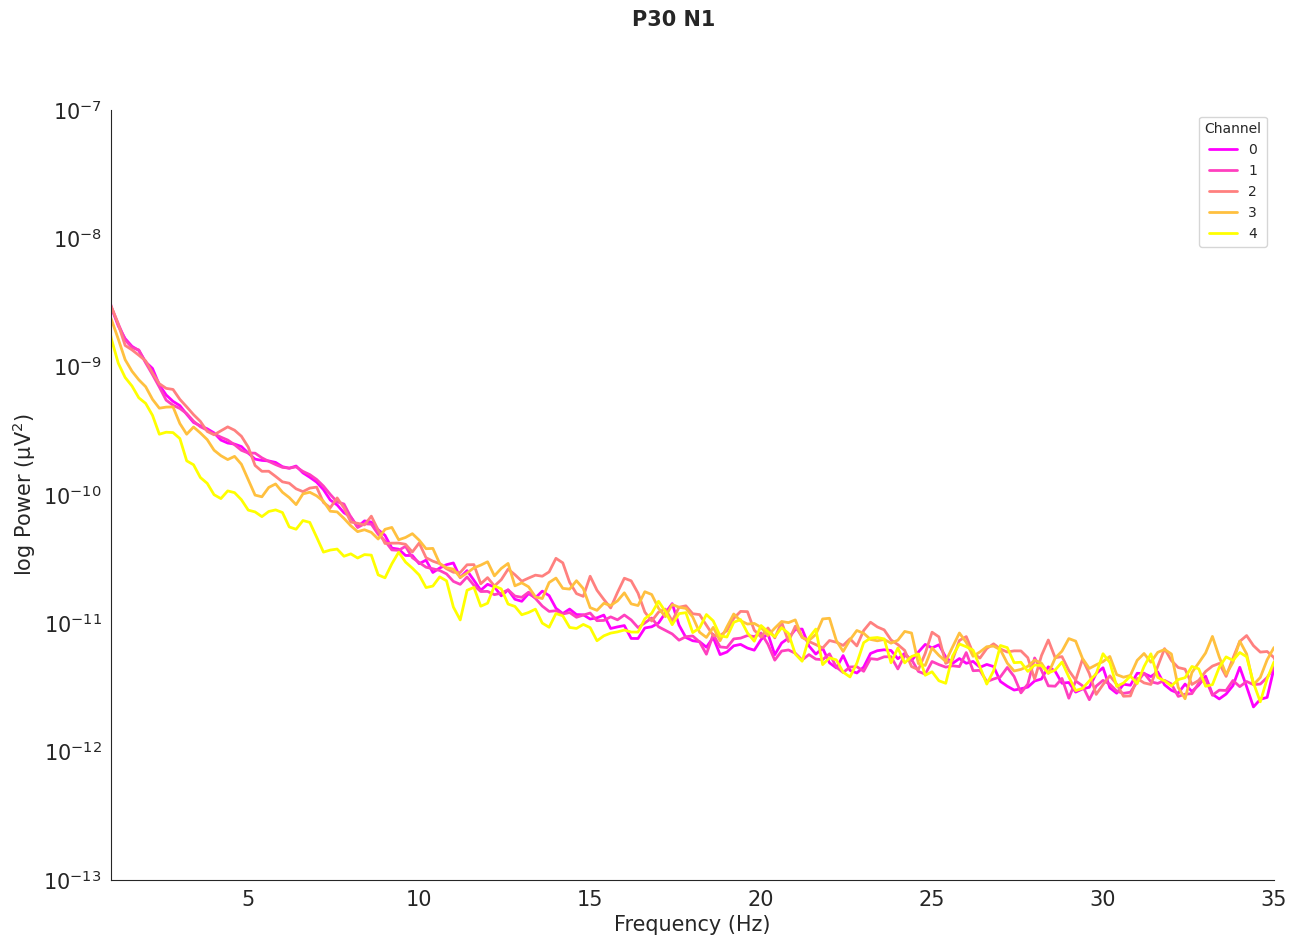

In [163]:
power_path = '/home/melissa/RESULTS/HUMAN/power_df_harmonics/'
save_power_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/Power/'
for patient in patient_list:    
    patient_power = pd.read_csv(f'{power_path}{patient}_power_df.csv')
    mean_power = patient_power.groupby(['Frequency', 'Channel'])['Power'].mean().reset_index() 
    select_power= mean_power[mean_power['Channel'] != 5]
    if patient in nt_genotype_human:
        genotype = 0
    elif patient in gap_genotype_human:
        genotype = 1
    plot_power(power_df = select_power, genotype = genotype, save_path = save_power_path, patient = patient)

In [208]:
power_path = '/home/melissa/RESULTS/HUMAN/power_df_harmonics/'
all_patients = []
for patient in patient_list:    
    patient_power = pd.read_csv(f'{power_path}{patient}_power_df.csv')
    mean_power = patient_power.groupby(['Frequency', 'Channel'])['Power'].mean().reset_index() 
    select_power= mean_power[mean_power['Channel'] != 5]
    if patient in nt_genotype_human:
        genotype = 0
    elif patient in gap_genotype_human:
        genotype = 1
    select_power['Genotype'] = [genotype]*len(select_power)
    select_power['Patient'] = [f'{patient}']*len(select_power)
    all_patients.append(select_power)

/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Genotype'] = [genotype]*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Patient'] = [f'{patient}']*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Genotype'] = [genotype]*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Patient'] = [f'{patient}']*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Genotype'] = [genotype]*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_power['Patient'] = [f'{patient}']*len(select_power)
/tmp/ipykernel_1063413/1604239411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [210]:
all_patients_concat = pd.concat(all_patients)
#all_patients_concat.to_csv('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Power/all_patients_power.csv')

In [211]:
all_patients_concat

Frequency  Channel         Power  Genotype Patient
0           0.0        0  1.965401e-09         0   P1 N1
1           0.0        1  2.437696e-09         0   P1 N1
2           0.0        2  2.067840e-09         0   P1 N1
3           0.0        3  2.524052e-09         0   P1 N1
4           0.0        4  3.235070e-09         0   P1 N1
...         ...      ...           ...       ...     ...
3840      128.0        0  2.416815e-20         1  P30 N1
3841      128.0        1  1.529856e-20         1  P30 N1
3842      128.0        2  2.329644e-20         1  P30 N1
3843      128.0        3  2.165354e-20         1  P30 N1
3844      128.0        4  2.537877e-20         1  P30 N1

[396970 rows x 5 columns]

In [212]:
chan_0 = all_patients_concat.loc[all_patients_concat['Channel'] == 0]
chan_1 = all_patients_concat.loc[all_patients_concat['Channel'] == 1]
chan_2 = all_patients_concat.loc[all_patients_concat['Channel'] == 2]
chan_3 = all_patients_concat.loc[all_patients_concat['Channel'] == 3]
chan_4 = all_patients_concat.loc[all_patients_concat['Channel'] == 4]

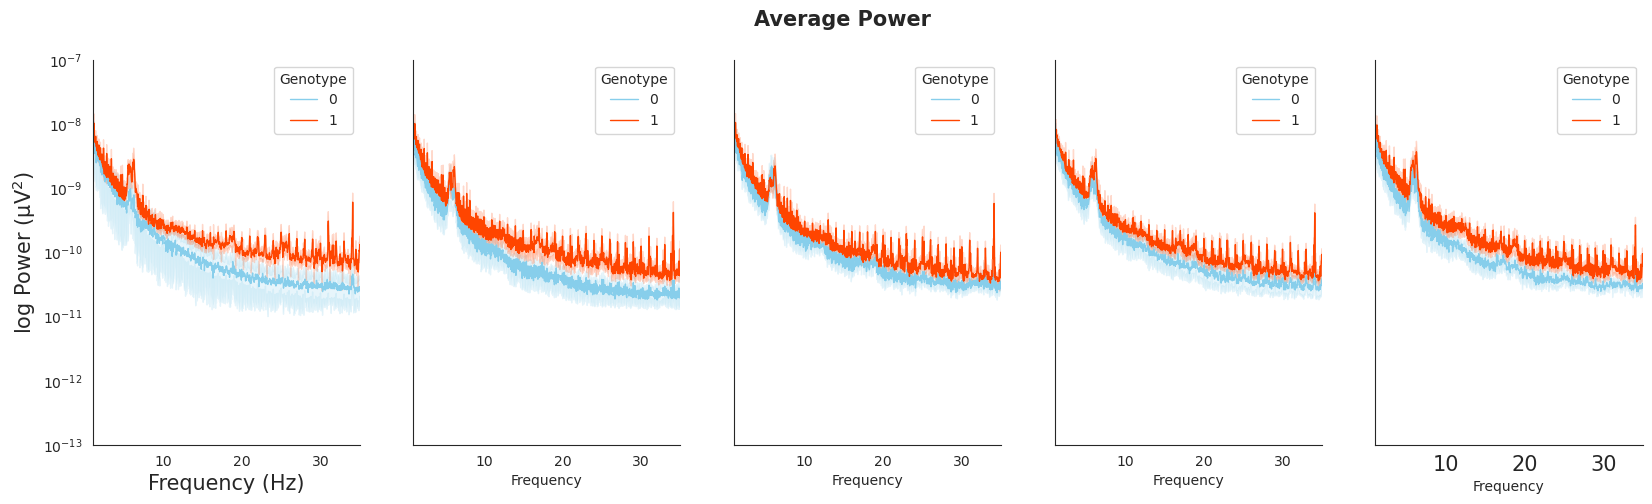

In [220]:
fig, axs = plt.subplots(1,5, figsize=(20,5), sharex = True, sharey=True)
genotype_order = [0, 1]
genotype_palette = ['skyblue', 'orangered']
    
sns.lineplot(data= chan_0, x='Frequency', y='Power',hue = 'Genotype', errorbar = ("se"), linewidth = 1,
            hue_order = genotype_order, palette = genotype_palette,ax = axs[0])
sns.lineplot(data= chan_1, x='Frequency', y='Power',hue = 'Genotype', errorbar = ("se"), linewidth = 1,
            hue_order = genotype_order, palette = genotype_palette,ax = axs[1])
sns.lineplot(data= chan_2, x='Frequency', y='Power',hue = 'Genotype', errorbar = ("se"), linewidth = 1,
            hue_order = genotype_order, palette = genotype_palette,ax = axs[2])
sns.lineplot(data= chan_3, x='Frequency', y='Power',hue = 'Genotype', errorbar = ("se"), linewidth = 1,
            hue_order = genotype_order, palette = genotype_palette,ax = axs[3])
sns.lineplot(data= chan_4, x='Frequency', y='Power',hue = 'Genotype', errorbar = ("se"), linewidth = 1,
            hue_order = genotype_order, palette = genotype_palette,ax = axs[4])

sns.despine()
plt.yscale('log')
axs[0].set_xlim(1, 35)
axs[0].set_ylim(10**-13, 10**-7)

axs[0].set_xlabel("Frequency (Hz)", fontsize = 15)
axs[0].set_ylabel("log Power (\u03bc$\\mathregular{V^{2}}$)", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)

    #include an overall plot title
plt.suptitle('Average Power', fontsize = 15, fontweight = 'bold')
plt.savefig(f'{save_path}all_patients_power.png')
plt.savefig(f'{save_path}all_patients_power.svg')

In [27]:
avg_power_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Power/'
all_patients = []
mean_ls = []
for patient in patient_list:
    power_test = pd.read_csv(f'{avg_power_path}{patient}_power.csv').drop(['Unnamed: 0'], axis = 1)
    df_separated = separate_power_frequency(power_test)
    if patient in nt_genotype_human:
        genotype = 0
    elif patient in gap_genotype_human:
        genotype = 1
    df_separated['Genotype'] = [genotype]*len(df_separated)
    all_patients.append(df_separated)
    for channel in channel_ls:
        channel_df = df_separated.loc[df_separated['Channel'] == channel]
        mean_channel = channel_df.groupby(['Patient', 'Frequency', 'Channel', 'Genotype'])['Power'].mean().reset_index() 
        mean_ls.append(mean_channel)

In [46]:
mean_concat = pd.concat(mean_ls)
patient_concat = pd.concat(all_patients)
channel_0 = patient_concat.loc[patient_concat['Channel'] == 0]
channel_1 = patient_concat.loc[patient_concat['Channel'] == 1]
channel_2 = patient_concat.loc[patient_concat['Channel'] == 2]
channel_3 = patient_concat.loc[patient_concat['Channel'] == 3]
channel_4 = patient_concat.loc[patient_concat['Channel'] == 4]

chan_0_mean = mean_concat.loc[mean_concat['Channel'] == 0]
chan_1_mean = mean_concat.loc[mean_concat['Channel'] == 1]
chan_2_mean = mean_concat.loc[mean_concat['Channel'] == 2]
chan_3_mean = mean_concat.loc[mean_concat['Channel'] == 3]
chan_4_mean = mean_concat.loc[mean_concat['Channel'] == 4]

channel_df_ls = [channel_0, channel_1, channel_2, channel_3, channel_4]
channel_mean_ls = [chan_0_mean, chan_1_mean, chan_2_mean, chan_3_mean, chan_4_mean]

In [52]:
chan_0_mean

Patient Frequency  Channel  Genotype         Power
0    P1 N1     alpha        0         0  3.055322e-11
1    P1 N1      beta        0         0  9.785511e-12
2    P1 N1     delta        0         0  5.497474e-10
3    P1 N1     gamma        0         0  5.983192e-12
0    P2 N1     alpha        0         1  1.794536e-10
..     ...       ...      ...       ...           ...
3   P29 N2     gamma        0         0  1.507834e-11
0   P30 N1     alpha        0         1  3.280316e-11
1   P30 N1      beta        0         1  7.205954e-12
2   P30 N1     delta        0         1  9.674075e-10
3   P30 N1     gamma        0         1  3.332889e-12

[124 rows x 5 columns]

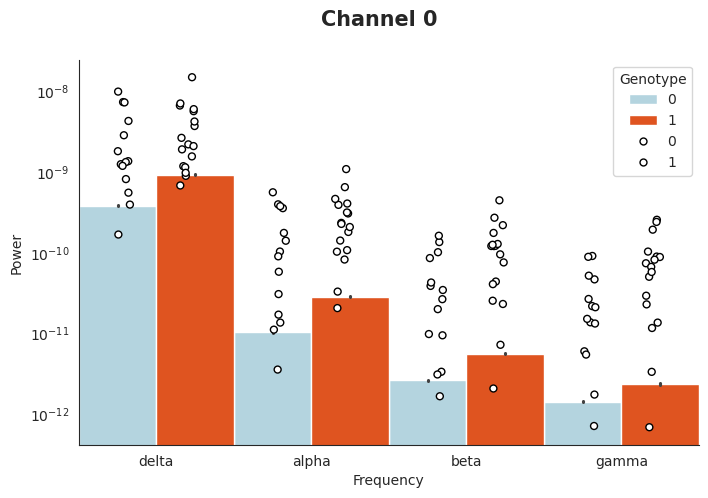

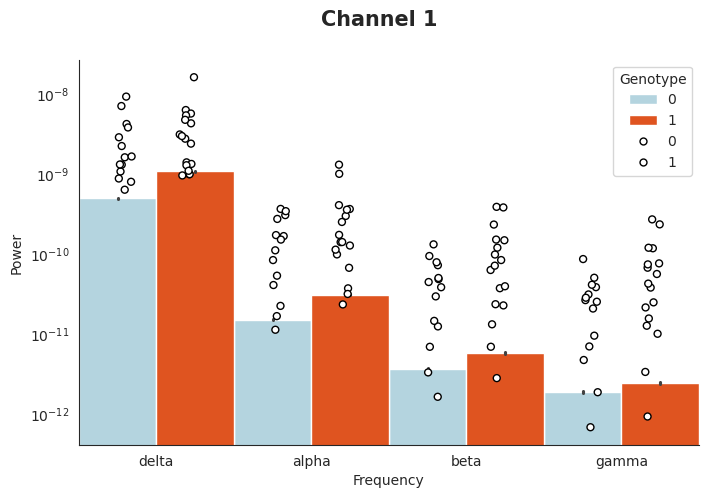

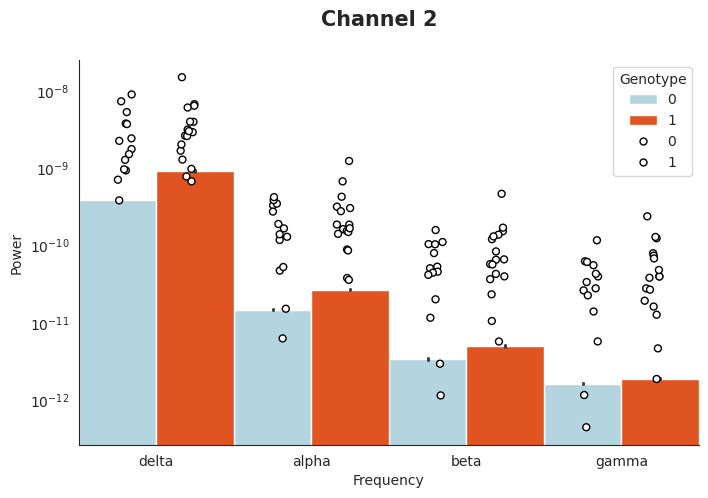

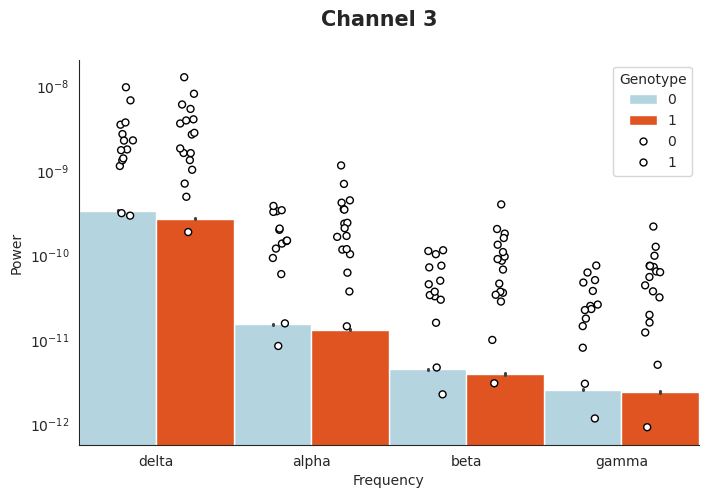

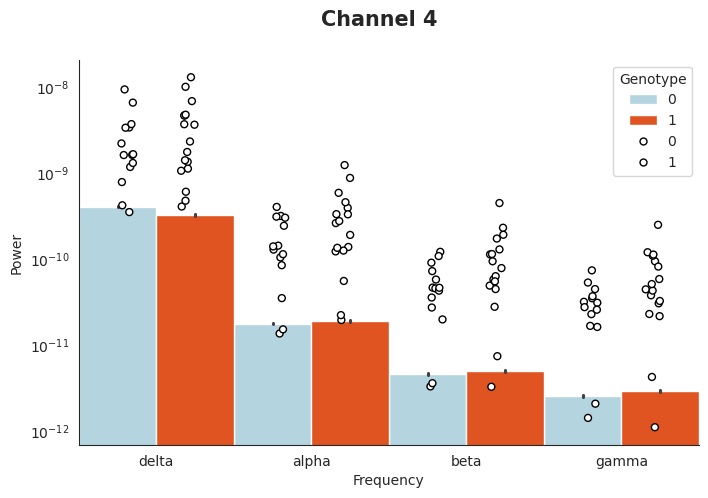

In [51]:
for channel_idx, channel_df, channel_mean in zip(channel_ls, channel_df_ls, channel_mean_ls):
    f, ax = plt.subplots(1,1, figsize=(8,5), sharey = True)
    sns.set_style("white")
    palette_plot = ['lightblue', 'orangered']
    hueorder = [0, 1]
    sns.despine()
    plt.yscale('log')
    pointplot_palette = ['white', 'white']
    sns.despine()
    plt.suptitle(f'Channel {channel_idx}', fontsize = 15, fontweight = 'bold')
    sns.barplot(x= 'Frequency', y='Power', hue='Genotype', errorbar = ("se"), data = channel_df, 
            hue_order = hueorder, width = 1.0,palette = palette_plot)
    sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = channel_mean, palette = pointplot_palette,
              edgecolor = 'k', dodge = True, linewidth = 1)
    plt.savefig((f'{save_path}channel_avg_{channel_idx}_power.png'))
    plt.savefig((f'{save_path}channel_avg_{channel_idx}_power.svg'))

## 5. Phase Locking Value

In [4]:
plv_numpy_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/plv_numpy/'
delta_gap = np.load(f'{plv_numpy_path}averaged_gap_delta.npy')
alpha_gap = np.load(f'{plv_numpy_path}averaged_gap_alpha.npy')
beta_gap = np.load(f'{plv_numpy_path}averaged_gap_beta.npy')
gamma_gap = np.load(f'{plv_numpy_path}averaged_gap_gamma.npy')
delta_wt = np.load(f'{plv_numpy_path}averaged_wt_delta.npy')
alpha_wt = np.load(f'{plv_numpy_path}averaged_wt_alpha.npy')
beta_wt = np.load(f'{plv_numpy_path}averaged_wt_beta.npy')
gamma_wt = np.load(f'{plv_numpy_path}averaged_wt_gamma.npy')

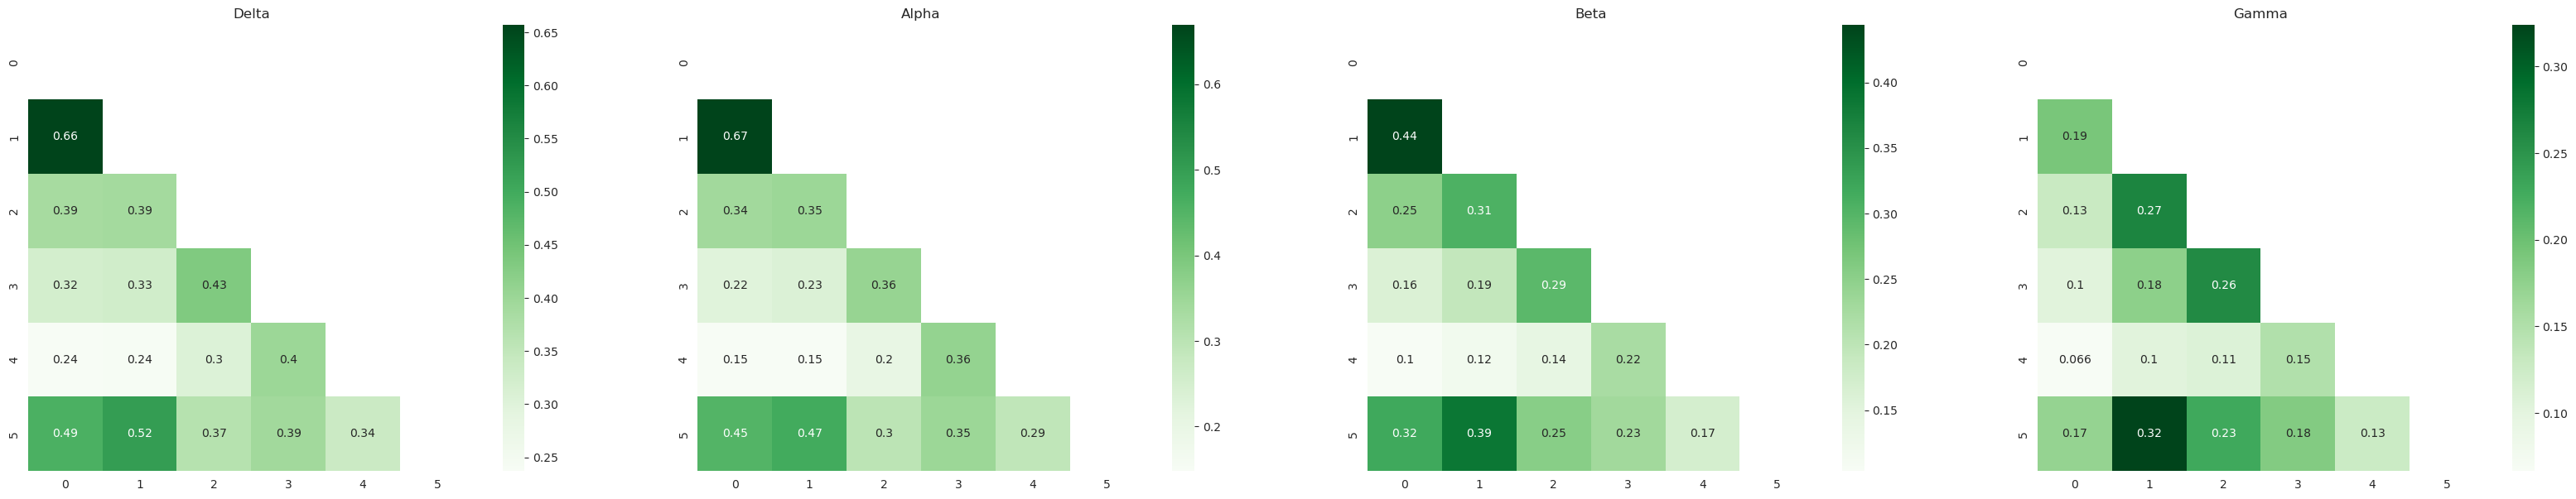

In [64]:
mask_0 = np.triu(np.ones_like(delta_gap, dtype=bool))
mask_1 = np.triu(np.ones_like(alpha_gap, dtype=bool))
mask_2 = np.triu(np.ones_like(beta_gap, dtype=bool))
mask_3 = np.triu(np.ones_like(gamma_gap, dtype=bool))


# Increase the size of the figure
fig, ax = plt.subplots(1, 4, figsize=(40, 7))  # Adjust figsize as needed

sns.heatmap(delta_gap, mask=mask_0, annot=True, cmap='Greens', ax=ax[0])
ax[0].set_title('Delta')

sns.heatmap(alpha_gap, mask=mask_1, annot=True, cmap='Greens', ax=ax[1])
ax[1].set_title('Alpha')

sns.heatmap(beta_gap, mask=mask_2, annot=True, cmap='Greens', ax=ax[2])
ax[2].set_title('Beta')

sns.heatmap(gamma_gap, mask=mask_3, annot=True, cmap='Greens', ax=ax[3])
ax[3].set_title('Gamma')


plt.savefig('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/plv_gap_all_freqs.png')
plt.savefig('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/plv_gap_all_freqs.svg')

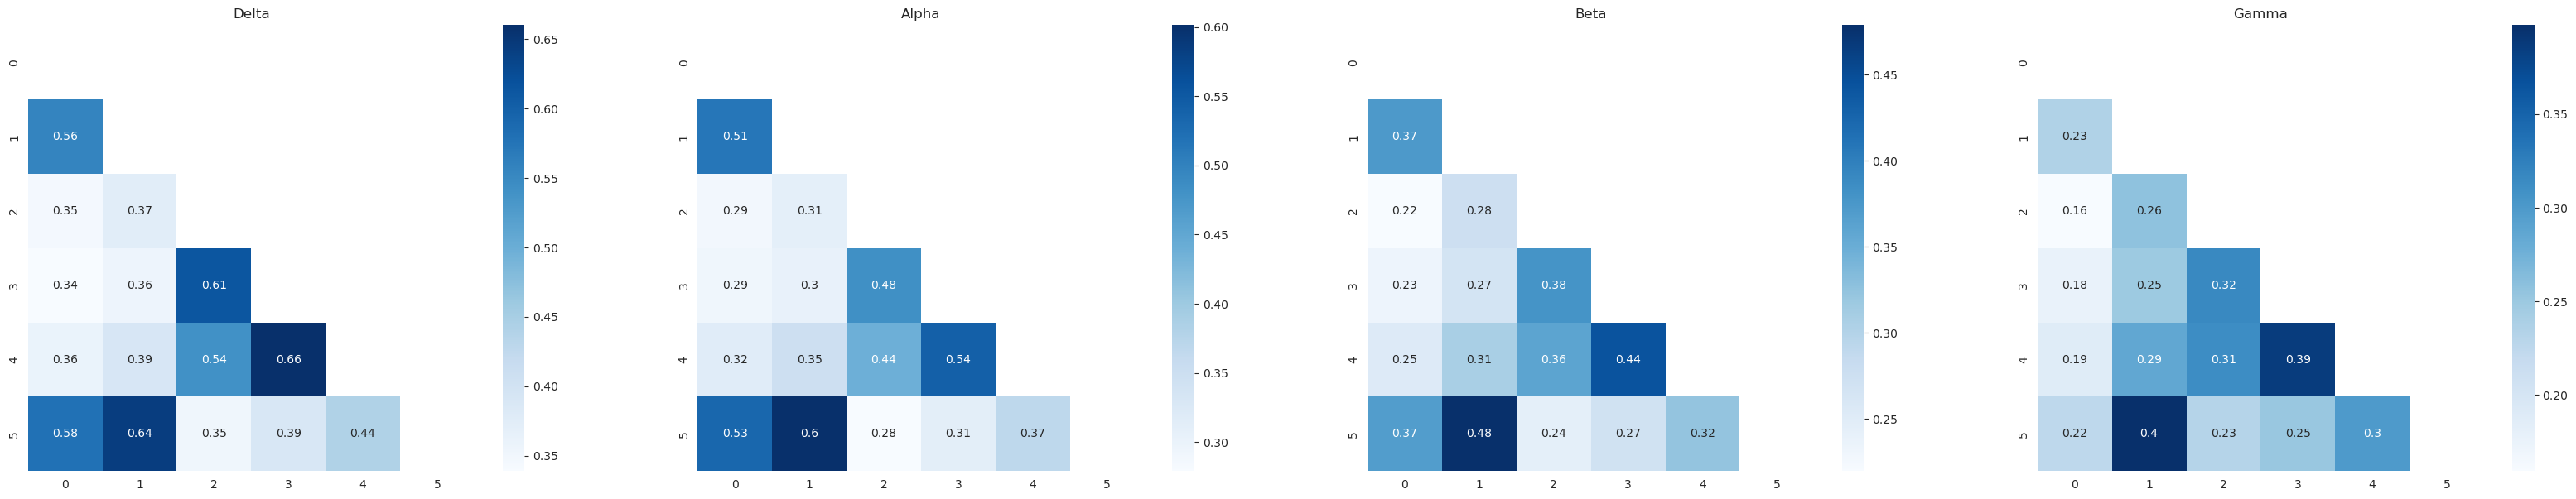

In [63]:
mask_0 = np.triu(np.ones_like(delta_wt, dtype=bool))
mask_1 = np.triu(np.ones_like(alpha_wt, dtype=bool))
mask_2 = np.triu(np.ones_like(beta_wt, dtype=bool))
mask_3 = np.triu(np.ones_like(gamma_wt, dtype=bool))


# Increase the size of the figure
fig, ax = plt.subplots(1, 4, figsize=(40, 7))  # Adjust figsize as needed

sns.heatmap(delta_wt, mask=mask_0, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Delta')

sns.heatmap(alpha_wt, mask=mask_1, annot=True, cmap='Blues', ax=ax[1])
ax[1].set_title('Alpha')

sns.heatmap(beta_wt, mask=mask_2, annot=True, cmap='Blues', ax=ax[2])
ax[2].set_title('Beta')

sns.heatmap(gamma_wt, mask=mask_3, annot=True, cmap='Blues', ax=ax[3])
ax[3].set_title('Gamma')


plt.savefig('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/plv_wt_all_freqs.png')
plt.savefig('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/plv_wt_all_freqs.svg')

delta


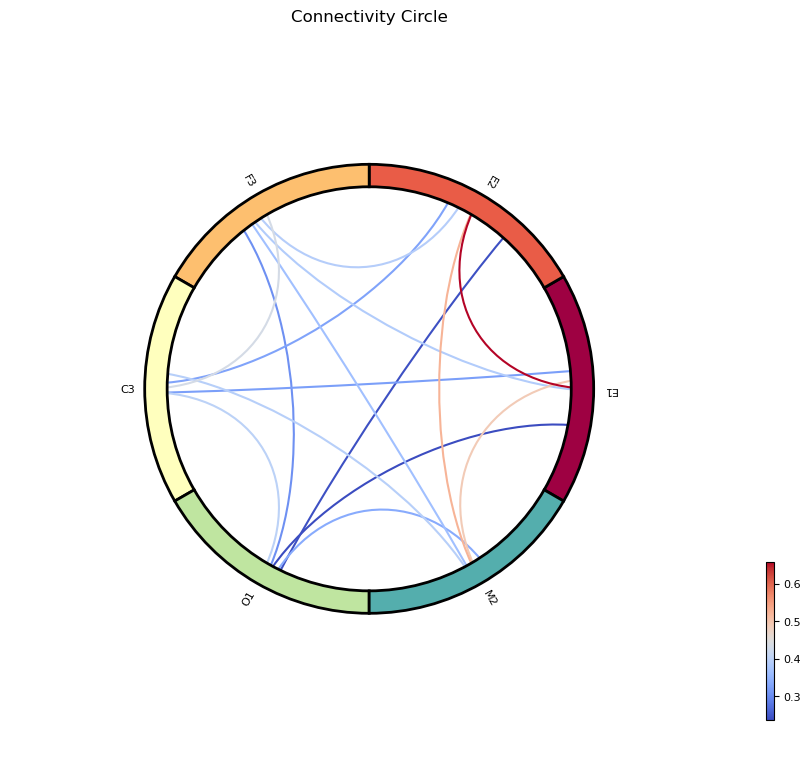

alpha


<Figure size 640x480 with 0 Axes>

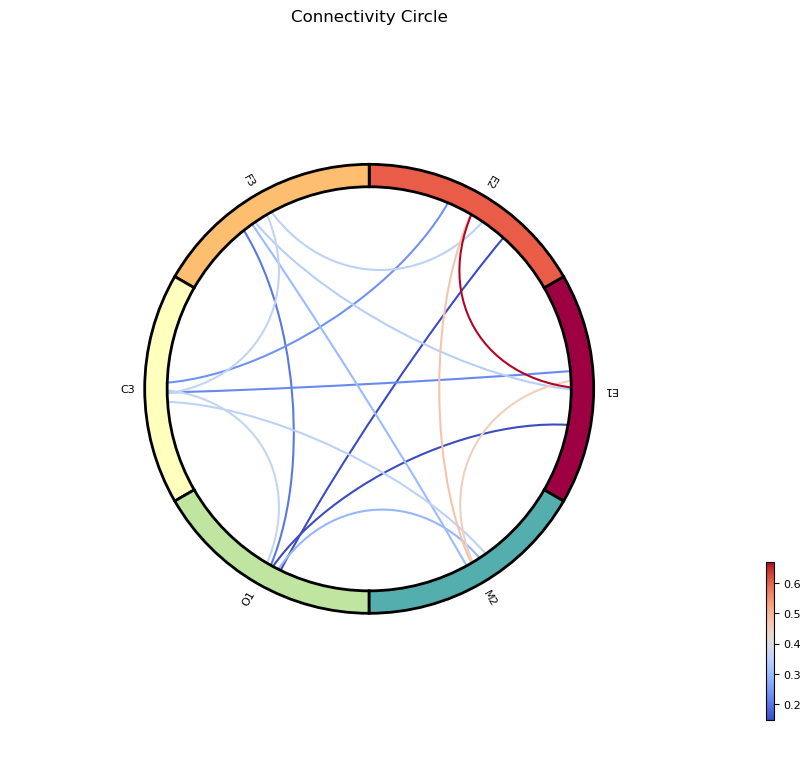

beta


<Figure size 640x480 with 0 Axes>

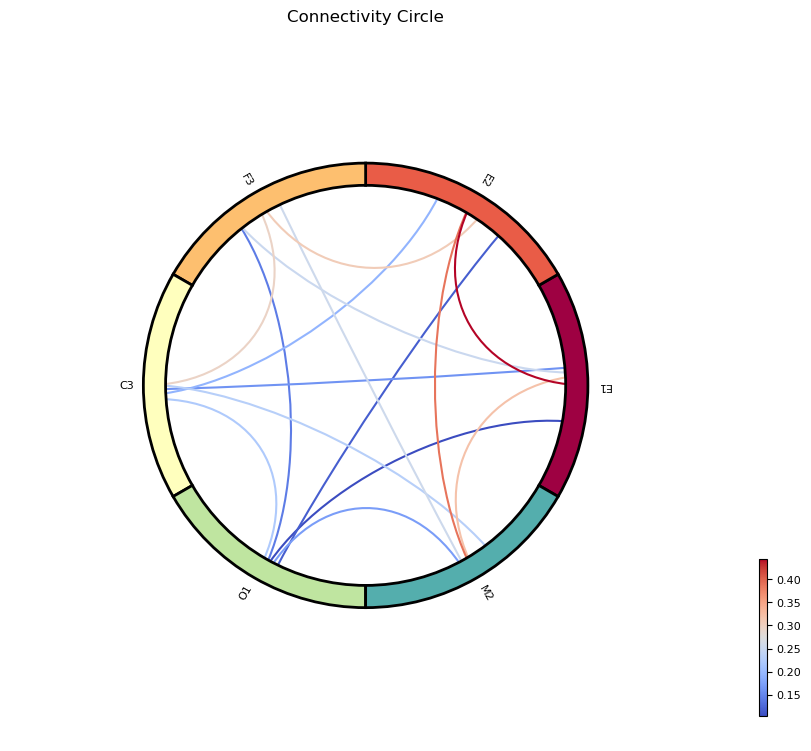

gamma


<Figure size 640x480 with 0 Axes>

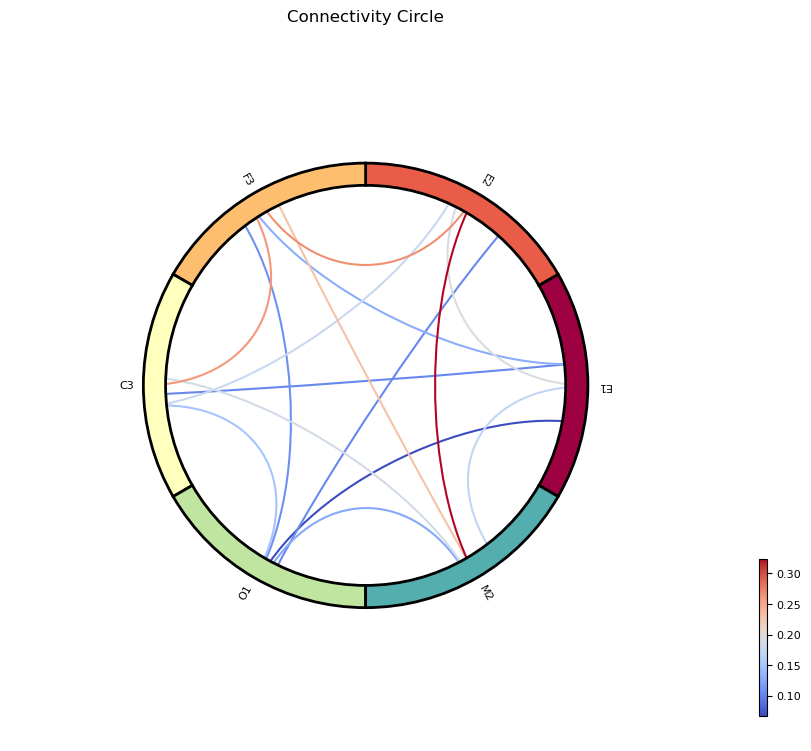

<Figure size 640x480 with 0 Axes>

In [6]:
channel_names = ['E1', 'E2', 'F3', 'C3', 'O1', 'M2']

plv_save_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/'
frequency_df = [delta_gap, alpha_gap, beta_gap, gamma_gap]
frequencies = ['delta', 'alpha', 'beta', 'gamma']

for freq, freq_df in zip(frequencies, frequency_df):
    print(freq)
    plot_connectivity_circle(freq_df, channel_names, 
                                   title='Connectivity Circle',
                                   colormap='coolwarm',   # Choose a colormap
                                   fontsize_title=12, fontsize_names=8,
                                   facecolor='white', textcolor='black',
                                   node_colors= None,  # Optional: specify colors for each node
                                   interactive=False)

    plt.savefig(f'{plv_save_path}{freq}_gap_plv_circle.png')
    plt.savefig(f'{plv_save_path}{freq}_gap_plv_circle.svg')

delta


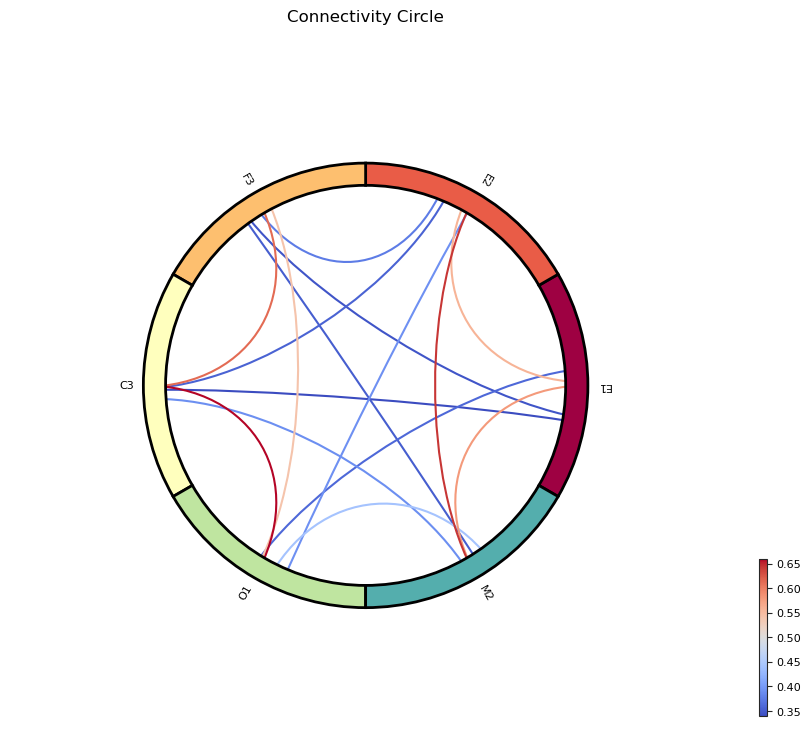

alpha


<Figure size 640x480 with 0 Axes>

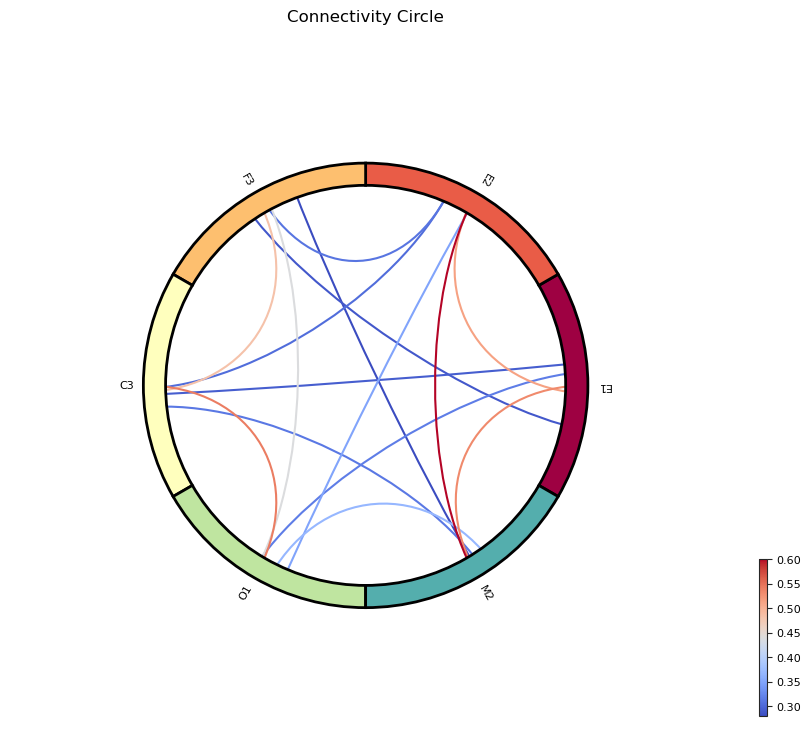

beta


<Figure size 640x480 with 0 Axes>

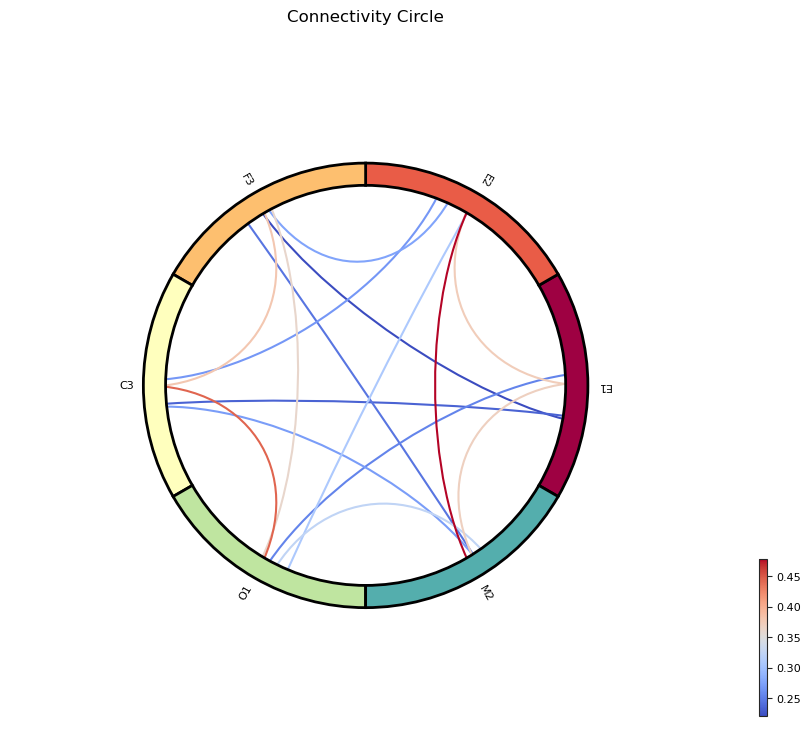

gamma


<Figure size 640x480 with 0 Axes>

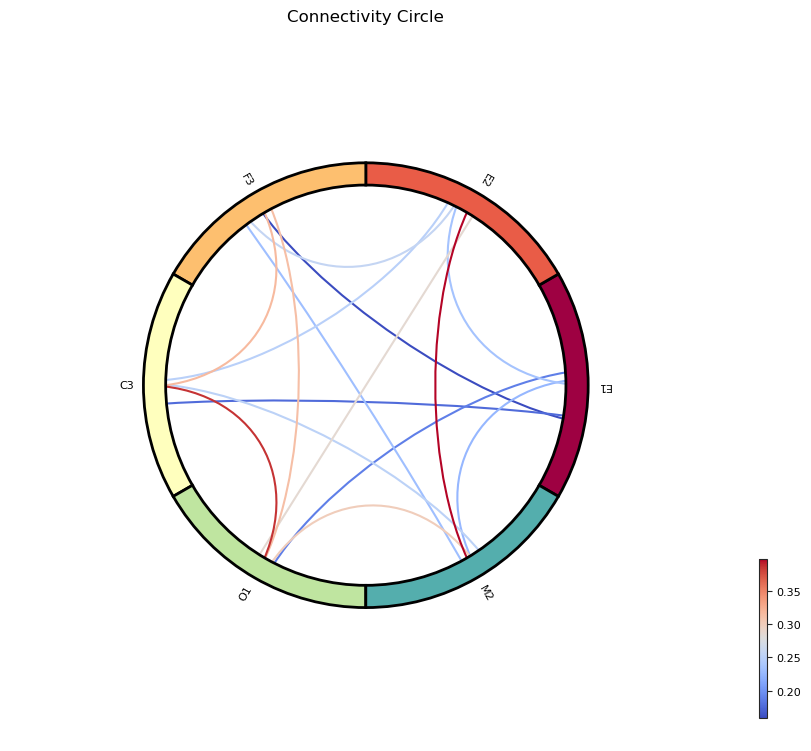

<Figure size 640x480 with 0 Axes>

In [71]:
channel_names = ['E1', 'E2', 'F3', 'C3', 'O1', 'M2']

plv_save_path = '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Results/Human/Plots/'
frequency_df = [delta_wt, alpha_wt, beta_wt, gamma_wt]
frequencies = ['delta', 'alpha', 'beta', 'gamma']

for freq, freq_df in zip(frequencies, frequency_df):
    print(freq)
    plot_connectivity_circle(freq_df, channel_names, 
                                   title='Connectivity Circle',
                                   colormap='coolwarm',   # Choose a colormap
                                   fontsize_title=12, fontsize_names=8,
                                   facecolor='white', textcolor='black',
                                   node_colors= None,  # Optional: specify colors for each node
                                   interactive=False)

    plt.savefig(f'{plv_save_path}{freq}_wt_plv_circle.png')
    plt.savefig(f'{plv_save_path}{freq}_wt_plv_circle.svg')

## 6. Max Cross Correlation 